Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics

from shared.helpers import store_model
from shared.helpers import store_predictions_and_create_graph

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column, 'New_cases_30_days_ago']]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


Train test split, fit and prediction

In [4]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

In [5]:
model.fit(train)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05645D+00    |proj g|=  6.89947D-02


 This problem is unconstrained.



At iterate    1    f=  9.05126D+00    |proj g|=  5.89170D-02

At iterate    2    f=  9.04783D+00    |proj g|=  3.07270D-02

At iterate    3    f=  9.04505D+00    |proj g|=  1.78804D-02

At iterate    4    f=  9.04295D+00    |proj g|=  1.98214D-02

At iterate    5    f=  9.03787D+00    |proj g|=  2.99427D-02

At iterate    6    f=  9.03354D+00    |proj g|=  4.97272D-02

At iterate    7    f=  9.02664D+00    |proj g|=  5.51364D-02

At iterate    8    f=  9.01685D+00    |proj g|=  6.17006D-02

At iterate    9    f=  9.01047D+00    |proj g|=  4.93672D-02

At iterate   10    f=  9.00862D+00    |proj g|=  1.13977D-01

At iterate   11    f=  9.00545D+00    |proj g|=  3.41726D-02

At iterate   12    f=  9.00417D+00    |proj g|=  1.97025D-02

At iterate   13    f=  9.00166D+00    |proj g|=  1.19335D-02

At iterate   14    f=  8.99877D+00    |proj g|=  2.62890D-02

At iterate   15    f=  8.99732D+00    |proj g|=  4.00613D-02

At iterate   16    f=  8.99560D+00    |proj g|=  1.53152D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.45988D+01    |proj g|=  6.98368D-01

At iterate    2    f=  1.43894D+01    |proj g|=  1.72197D-01

At iterate    3    f=  1.43621D+01    |proj g|=  6.52857D-02

At iterate    4    f=  1.43552D+01    |proj g|=  3.41856D-02

At iterate    5    f=  1.43457D+01    |proj g|=  5.80447D-02

At iterate    6    f=  1.43227D+01    |proj g|=  9.66077D-02

At iterate    7    f=  1.43141D+01    |proj g|=  7.24140D-02

At iterate    8    f=  1.43071D+01    |proj g|=  5.44737D-02

At iterate    9    f=  1.43000D+01    |proj g|=  4.74754D-02

At iterate   10    f=  1.42969D+01    |proj g|=  1.03151D-01

At iterate   11    f=  1.42951D+01    |proj g|=  6.30843D-02

At iterate   12    f=  1.42944D+01    |proj g|=  1.16680D-01

At iterate   13    f=  1.42929D+01    |proj g|=  4.59881D-02

At iterate   14    f=  1.42915D+01    |proj g|=  7.56888D-02

At iterate   15    f=  1.42895D+01    |proj g|=  5.07403D-02

At iterate   16    f=  1.42864D+01    |proj g|=  4.28264D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5
Model Number: 6 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-04-13 20:45:57.758240: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 20:45:58.199841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 20:45:58.199928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 20:45:58.234401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 20:45:58.332052: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
35/35 [==============================] - 12s 9ms/step - loss: 0.4066
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.4007
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.3969
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3933
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3916
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3909
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.3890
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3885
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3875
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3886
Epoch 11/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3862
Epoch 12/50
35/35 [==============================] - 0s 5ms/step - loss: 0.3863
Epoch 13/50
35/35 [=============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:46:42 - cmdstanpy - INFO - Chain [1] start processing
20:46:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegr

 This problem is unconstrained.



At iterate    1    f=  8.43189D+00    |proj g|=  6.05117D-03

At iterate    2    f=  8.43189D+00    |proj g|=  3.56072D-03

At iterate    3    f=  8.43188D+00    |proj g|=  3.75977D-03

At iterate    4    f=  8.43187D+00    |proj g|=  3.74118D-03

At iterate    5    f=  8.43186D+00    |proj g|=  1.64678D-03

At iterate    6    f=  8.43186D+00    |proj g|=  1.17310D-03

At iterate    7    f=  8.43186D+00    |proj g|=  7.41338D-04

At iterate    8    f=  8.43186D+00    |proj g|=  2.72636D-04

At iterate    9    f=  8.43186D+00    |proj g|=  2.71297D-04

At iterate   10    f=  8.43186D+00    |proj g|=  3.24833D-04

At iterate   11    f=  8.43186D+00    |proj g|=  3.89936D-04

At iterate   12    f=  8.43186D+00    |proj g|=  7.41813D-04

At iterate   13    f=  8.43186D+00    |proj g|=  1.74357D-03

At iterate   14    f=  8.43186D+00    |proj g|=  5.58286D-04

At iterate   15    f=  8.43186D+00    |proj g|=  5.84279D-04

At iterate   16    f=  8.43186D+00    |proj g|=  2.26762D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.52243D+01    |proj g|=  1.39940D-02

At iterate    3    f=  1.52241D+01    |proj g|=  2.57786D-02

At iterate    4    f=  1.52240D+01    |proj g|=  1.40282D-02

At iterate    5    f=  1.52239D+01    |proj g|=  1.78867D-02

At iterate    6    f=  1.52239D+01    |proj g|=  8.49568D-03

At iterate    7    f=  1.52239D+01    |proj g|=  1.10856D-02

At iterate    8    f=  1.52238D+01    |proj g|=  8.81992D-03

At iterate    9    f=  1.52238D+01    |proj g|=  6.87171D-03

At iterate   10    f=  1.52237D+01    |proj g|=  4.80738D-03

At iterate   11    f=  1.52236D+01    |proj g|=  5.81873D-03

At iterate   12    f=  1.52235D+01    |proj g|=  1.19847D-02

At iterate   13    f=  1.52234D+01    |proj g|=  1.51972D-02

At iterate   14    f=  1.52233D+01    |proj g|=  6.37248D-03

At iterate   15    f=  1.52233D+01    |proj g|=  1.50363D-02

At iterate   16    f=  1.52232D+01    |proj g|=  1.67941D-02

At iterate   17    f=  1.52229D+01    |proj g|=  3.85128D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 74 with model FFT in generation 0 of 5
Model Number: 75 with model MetricMotif in generation 0 of 5
Model Number: 76 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76 in generation 0: PreprocessingRegression
Model Number: 77 with model KalmanStateSpace in generation 0 of 5
Model Number: 78 with model PreprocessingRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 79 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 79 in generation 0: UnivariateMotif
Model Number: 80 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 80 in generation 0: GLM
Model Number: 81 with model ETS in generation 0 of 5
Model Number: 82 with model FBProphet in generation 0 of 5
Model Number: 83 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 83 in generation 0: FBProphet
Model Number: 84 with model Theta in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'PctChangeTransformer', '1': 'CenterLastValue'}, 'transformation_params': {'0': {}, '1': {'rows': 3}}}. fail_on_forecast_nan=True") in model 84 in generation 0: Theta
Model Number: 85 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 85 in generation 0: MLEnsemble
Model Number: 86 with model MetricMotif in generation 0 of 5
Model Number: 87 with model Theta in generation 0 of 5
Model Number: 88 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 88 in generation 0: UnivariateRegression
Model Number: 89 with model ARCH in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 89 in generation 0: ARCH
Model Number: 90 with model Unobserved

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 92 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 92 in generation 0: DatepartRegression
Model Number: 93 with model ARDL in generation 0 of 5
Model Number: 94 with model ARDL in generation 0 of 5
Model Number: 95 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 95 in generation 0: ARIMA
Model Number: 96 with model FBProphet in generation 0 of 5
Model Number: 97 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 97 in generation 0: PreprocessingRegression
Model Number: 98 with model FBProphet in generation 0 of 5
Model Number: 99 with model Theta in generation 0 of 5
Model Number: 100 with model UnivariateRegression in generation 0 of 5
Model Number: 101 with model GLS in gener

 This problem is unconstrained.



At iterate    8    f=  8.59891D+00    |proj g|=  1.32635D-01

At iterate    9    f=  8.59570D+00    |proj g|=  4.35904D-02

At iterate   10    f=  8.59396D+00    |proj g|=  3.73039D-02

At iterate   11    f=  8.59070D+00    |proj g|=  2.81520D-02

At iterate   12    f=  8.58745D+00    |proj g|=  2.43389D-02

At iterate   13    f=  8.58417D+00    |proj g|=  3.04520D-02

At iterate   14    f=  8.58182D+00    |proj g|=  6.00127D-02

At iterate   15    f=  8.57918D+00    |proj g|=  3.69659D-02

At iterate   16    f=  8.57801D+00    |proj g|=  1.36599D-01

At iterate   17    f=  8.57762D+00    |proj g|=  2.24180D-02

At iterate   18    f=  8.57752D+00    |proj g|=  8.31789D-03

At iterate   19    f=  8.57747D+00    |proj g|=  7.86394D-03

At iterate   20    f=  8.57727D+00    |proj g|=  5.87750D-03

At iterate   21    f=  8.57697D+00    |proj g|=  6.90405D-03

At iterate   22    f=  8.57683D+00    |proj g|=  5.80050D-02

At iterate   23    f=  8.57658D+00    |proj g|=  1.57158D-02

At iter

 This problem is unconstrained.



At iterate    8    f=  1.39997D+01    |proj g|=  1.22303D-01

At iterate    9    f=  1.39877D+01    |proj g|=  8.07326D-02

At iterate   10    f=  1.39815D+01    |proj g|=  1.44199D-01

At iterate   11    f=  1.39788D+01    |proj g|=  1.72513D-01

At iterate   12    f=  1.39746D+01    |proj g|=  1.09700D-01

At iterate   13    f=  1.39711D+01    |proj g|=  6.13558D-02

At iterate   14    f=  1.39657D+01    |proj g|=  8.84818D-02

At iterate   15    f=  1.39602D+01    |proj g|=  1.50797D-01

At iterate   16    f=  1.39559D+01    |proj g|=  7.62521D-02

At iterate   17    f=  1.39521D+01    |proj g|=  6.77884D-02

At iterate   18    f=  1.39453D+01    |proj g|=  8.16891D-02

At iterate   19    f=  1.39426D+01    |proj g|=  1.27693D-01

At iterate   20    f=  1.39385D+01    |proj g|=  1.76198D-01

At iterate   21    f=  1.39341D+01    |proj g|=  1.89867D-01

At iterate   22    f=  1.39324D+01    |proj g|=  1.68951D-01

At iterate   23    f=  1.39300D+01    |proj g|=  1.10608D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  8.56694D+00    |proj g|=  3.79768D-02

At iterate    3    f=  8.56612D+00    |proj g|=  2.00532D-02

At iterate    4    f=  8.56588D+00    |proj g|=  2.41312D-02

At iterate    5    f=  8.56570D+00    |proj g|=  1.57479D-02

At iterate    6    f=  8.56557D+00    |proj g|=  1.40290D-02

At iterate    7    f=  8.56543D+00    |proj g|=  1.26389D-02

At iterate    8    f=  8.56539D+00    |proj g|=  2.63320D-03

At iterate    9    f=  8.56539D+00    |proj g|=  2.86680D-03

At iterate   10    f=  8.56538D+00    |proj g|=  2.38374D-03

At iterate   11    f=  8.56538D+00    |proj g|=  1.57435D-03

At iterate   12    f=  8.56538D+00    |proj g|=  1.21941D-03

At iterate   13    f=  8.56538D+00    |proj g|=  1.28279D-03

At iterate   14    f=  8.56538D+00    |proj g|=  3.65504D-04

At iterate   15    f=  8.56538D+00    |proj g|=  3.14533D-04

At iterate   16    f=  8.56538D+00    |proj g|=  7.78663D-04

At iterate   17    f=  8.56538D+00    |proj g|=  6.50808D-04

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37068D+01    |proj g|=  1.46263D-02

At iterate    1    f=  1.37068D+01    |proj g|=  7.44234D-03

At iterate    2    f=  1.37068D+01    |proj g|=  4.57327D-03

At iterate    3    f=  1.37067D+01    |proj g|=  2.94987D-03

At iterate    4    f=  1.37067D+01    |proj g|=  2.16003D-03

At iterate    5    f=  1.37067D+01    |proj g|=  2.84567D-03

At iterate    6    f=  1.37067D+01    |proj g|=  2.09261D-03

At iterate    7    f=  1.37067D+01    |proj g|=  1.84670D-03

At iterate    8    f=  1.37067D+01    |proj g|=  1.11483D-03

At iterate    9    f=  1.37067D+01    |proj g|=  1.16483D-03

At iterate   10    f=  1.37067D+01    |proj g|=  1.52253D-03

At iterate   11    f=  1.37067D+01    |proj g|=  2.23559D-03

At iterate   12    f=  1.37067D+01    |proj g|=  3.70492D-03

At iterate   13    f=  1.3

 This problem is unconstrained.



At iterate    3    f=  1.35932D+00    |proj g|=  5.50201D-02

At iterate    4    f=  1.35557D+00    |proj g|=  3.08530D-02

At iterate    5    f=  1.35241D+00    |proj g|=  5.32480D-02

At iterate    6    f=  1.34913D+00    |proj g|=  3.93889D-02

At iterate    7    f=  1.34615D+00    |proj g|=  4.42929D-02

At iterate    8    f=  1.33899D+00    |proj g|=  6.22778D-02

At iterate    9    f=  1.33643D+00    |proj g|=  7.50328D-02

At iterate   10    f=  1.33175D+00    |proj g|=  5.74126D-02

At iterate   11    f=  1.32529D+00    |proj g|=  6.55328D-02

At iterate   12    f=  1.31994D+00    |proj g|=  6.67625D-02

At iterate   13    f=  1.31568D+00    |proj g|=  6.79072D-02

At iterate   14    f=  1.30672D+00    |proj g|=  9.10825D-02

At iterate   15    f=  1.30162D+00    |proj g|=  1.76736D-01

At iterate   16    f=  1.29938D+00    |proj g|=  1.87942D-01

At iterate   17    f=  1.29775D+00    |proj g|=  3.24778D-02

At iterate   18    f=  1.29693D+00    |proj g|=  3.43293D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  1.36986D+00    |proj g|=  8.54422D-02

At iterate    5    f=  1.36110D+00    |proj g|=  6.52431D-02

At iterate    6    f=  1.35615D+00    |proj g|=  6.37902D-02

At iterate    7    f=  1.34889D+00    |proj g|=  1.11298D-01

At iterate    8    f=  1.34438D+00    |proj g|=  1.29157D-01

At iterate    9    f=  1.33952D+00    |proj g|=  6.65641D-02

At iterate   10    f=  1.33606D+00    |proj g|=  4.10057D-02

At iterate   11    f=  1.33298D+00    |proj g|=  3.40861D-02

At iterate   12    f=  1.32912D+00    |proj g|=  5.07736D-02

At iterate   13    f=  1.32845D+00    |proj g|=  3.02293D-02

At iterate   14    f=  1.32793D+00    |proj g|=  1.52087D-02

At iterate   15    f=  1.32736D+00    |proj g|=  3.17586D-02

At iterate   16    f=  1.32685D+00    |proj g|=  9.49398D-02

At iterate   17    f=  1.32621D+00    |proj g|=  5.17686D-02

At iterate   18    f=  1.32586D+00    |proj g|=  3.33393D-02

At iterate   19    f=  1.32568D+00    |proj g|=  3.04434D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 183 with model GLS in generation 1 of 5
Model Number: 184 with model MetricMotif in generation 1 of 5
Model Number: 185 with model SeasonalityMotif in generation 1 of 5
Model Number: 186 with model LastValueNaive in generation 1 of 5
Model Number: 187 with model GLM in generation 1 of 5
Model Number: 188 with model ETS in generation 1 of 5
Model Number: 189 with model UnivariateMotif in generation 1 of 5
Model Number: 190 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 190 in generation 1: FBProphet
Model Number: 191 with model UnobservedComponents in generation 1 of 5
Model Number: 192 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 192 in generation 1: SeasonalityMotif
Model Number: 193 with model LastValueNaive in generation 1 of 5
Model Number: 194 with model UnobservedComponents in generat

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 219 with model DatepartRegression in generation 1 of 5
Model Number: 220 with model ETS in generation 1 of 5
Model Number: 221 with model LastValueNaive in generation 1 of 5
Model Number: 222 with model KalmanStateSpace in generation 1 of 5
Model Number: 223 with model MetricMotif in generation 1 of 5
Model Number: 224 with model Theta in generation 1 of 5
Model Number: 225 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 225 in generation 1: DatepartRegression
Model Number: 226 with model FBProphet in generation 1 of 5
Model Number: 227 with model LastValueNaive in generation 1 of 5
Model Number: 228 with model LastValueNaive in generation 1 of 5
Model Number: 229 with model SeasonalNaive in generation 1 of 5
Model Number: 230 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 230 in generat

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 237 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47704D+00    |proj g|=  3.38768D-02


 This problem is unconstrained.



At iterate    1    f=  8.47697D+00    |proj g|=  1.86173D-02

At iterate    2    f=  8.47693D+00    |proj g|=  1.92499D-02

At iterate    3    f=  8.47683D+00    |proj g|=  2.39503D-02

At iterate    4    f=  8.47672D+00    |proj g|=  2.27587D-02

At iterate    5    f=  8.47668D+00    |proj g|=  2.30893D-02

At iterate    6    f=  8.47663D+00    |proj g|=  1.01668D-02

At iterate    7    f=  8.47661D+00    |proj g|=  8.78924D-03

At iterate    8    f=  8.47659D+00    |proj g|=  1.13882D-02

At iterate    9    f=  8.47656D+00    |proj g|=  8.34790D-03

At iterate   10    f=  8.47653D+00    |proj g|=  6.02434D-03

At iterate   11    f=  8.47649D+00    |proj g|=  1.12833D-02

At iterate   12    f=  8.47644D+00    |proj g|=  1.78089D-02

At iterate   13    f=  8.47640D+00    |proj g|=  1.13285D-02

At iterate   14    f=  8.47636D+00    |proj g|=  1.35075D-02

At iterate   15    f=  8.47634D+00    |proj g|=  6.47091D-03

At iterate   16    f=  8.47633D+00    |proj g|=  9.61706D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  1.34987D+01    |proj g|=  6.49227D-02

At iterate    4    f=  1.34977D+01    |proj g|=  1.05946D-01

At iterate    5    f=  1.34966D+01    |proj g|=  8.64806D-02

At iterate    6    f=  1.34963D+01    |proj g|=  1.86912D-01

At iterate    7    f=  1.34951D+01    |proj g|=  2.45655D-02

At iterate    8    f=  1.34949D+01    |proj g|=  2.37706D-02

At iterate    9    f=  1.34946D+01    |proj g|=  1.75128D-02

At iterate   10    f=  1.34946D+01    |proj g|=  5.43076D-02

At iterate   11    f=  1.34945D+01    |proj g|=  1.68555D-02

At iterate   12    f=  1.34944D+01    |proj g|=  1.29931D-02

At iterate   13    f=  1.34944D+01    |proj g|=  1.40910D-02

At iterate   14    f=  1.34943D+01    |proj g|=  1.34918D-02

At iterate   15    f=  1.34943D+01    |proj g|=  9.39336D-03

At iterate   16    f=  1.34943D+01    |proj g|=  1.32564D-02

At iterate   17    f=  1.34942D+01    |proj g|=  1.68921D-02

At iterate   18    f=  1.34941D+01    |proj g|=  1.26389D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  6.64796D-01    |proj g|=  1.30646D-01

At iterate    4    f=  6.47680D-01    |proj g|=  3.19687D-01

At iterate    5    f=  6.34652D-01    |proj g|=  3.81400D-01

At iterate    6    f=  6.12948D-01    |proj g|=  3.26630D-01

At iterate    7    f=  5.79721D-01    |proj g|=  1.35389D-01

At iterate    8    f=  5.74906D-01    |proj g|=  9.40133D-02

At iterate    9    f=  5.69765D-01    |proj g|=  9.10887D-02

At iterate   10    f=  5.49731D-01    |proj g|=  2.22386D-01

At iterate   11    f=  5.33703D-01    |proj g|=  1.32730D-01

At iterate   12    f=  5.23478D-01    |proj g|=  4.58135D-01

At iterate   13    f=  5.05681D-01    |proj g|=  1.42956D-01

At iterate   14    f=  4.98485D-01    |proj g|=  7.33970D-02

At iterate   15    f=  4.94956D-01    |proj g|=  6.65221D-02

At iterate   16    f=  4.92483D-01    |proj g|=  1.16442D-01

At iterate   17    f=  4.89895D-01    |proj g|=  5.41723D-02

At iterate   18    f=  4.88277D-01    |proj g|=  3.48886D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   96    f=  4.75452D-01    |proj g|=  1.03915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     96    134      2     0     0   1.039D-04   4.755D-01
  F =  0.47545177120233106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54525D-01    |proj g|=  3.22823D-01

At iterate    1    f=  6.15465D-01    |proj g|=  2.43120D-01

At iterate    2    f=  6.08442D-01    |proj g|=  2.28318D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.02423D+00    |proj g|=  6.16038D+00

At iterate    2    f= -1.44772D+00    |proj g|=  2.17116D+00

At iterate    3    f= -1.46527D+00    |proj g|=  7.49702D+00

At iterate    4    f= -1.60311D+00    |proj g|=  2.17832D+00

At iterate    5    f= -1.64275D+00    |proj g|=  2.30532D+00

At iterate    6    f= -1.70111D+00    |proj g|=  5.59608D-01

At iterate    7    f= -1.70616D+00    |proj g|=  1.04555D+00

At iterate    8    f= -1.70839D+00    |proj g|=  2.03551D-01

At iterate    9    f= -1.70930D+00    |proj g|=  3.44445D-01

At iterate   10    f= -1.71106D+00    |proj g|=  2.90744D-01

At iterate   11    f= -1.71695D+00    |proj g|=  1.41343D-01

At iterate   12    f= -1.72584D+00    |proj g|=  6.33819D-01

At iterate   13    f= -1.72954D+00    |proj g|=  3.50154D-01

At iterate   14    f= -1.73300D+00    |proj g|=  2.43722D-01

At iterate   15    f= -1.73676D+00    |proj g|=  5.25443D-01

At iterate   16    f= -1.74102D+00    |proj g|=  2.29942D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61057D+00    |proj g|=  5.67993D+00


 This problem is unconstrained.



At iterate    1    f= -1.62906D+00    |proj g|=  1.74177D+00

At iterate    2    f= -1.65399D+00    |proj g|=  1.44302D+00

At iterate    3    f= -1.70364D+00    |proj g|=  1.47283D+01

At iterate    4    f= -1.77632D+00    |proj g|=  6.55341D+00

At iterate    5    f= -1.86443D+00    |proj g|=  6.74018D+00

At iterate    6    f= -1.89862D+00    |proj g|=  2.75171D-01

At iterate    7    f= -1.90987D+00    |proj g|=  1.02250D+00

At iterate    8    f= -1.91489D+00    |proj g|=  1.30287D+00

At iterate    9    f= -1.92081D+00    |proj g|=  1.16806D+00

At iterate   10    f= -1.94047D+00    |proj g|=  5.07613D-01

At iterate   11    f= -1.96859D+00    |proj g|=  1.53380D+00

At iterate   12    f= -1.98874D+00    |proj g|=  3.51260D+00

At iterate   13    f= -1.99325D+00    |proj g|=  1.18238D+00

At iterate   14    f= -1.99411D+00    |proj g|=  1.84793D-01

At iterate   15    f= -1.99428D+00    |proj g|=  1.17820D-01

At iterate   16    f= -1.99441D+00    |proj g|=  1.61082D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  7.61743D-01    |proj g|=  4.11628D-01

At iterate    2    f=  7.07440D-01    |proj g|=  2.09869D-01

At iterate    3    f=  6.56774D-01    |proj g|=  3.29446D-01

At iterate    4    f=  6.02883D-01    |proj g|=  7.50487D-01

At iterate    5    f=  5.53943D-01    |proj g|=  2.63969D-01

At iterate    6    f=  5.14158D-01    |proj g|=  3.17525D-01

At iterate    7    f=  4.29799D-01    |proj g|=  6.29003D-01

At iterate    8    f=  3.85816D-01    |proj g|=  5.70982D-01

At iterate    9    f=  3.31412D-01    |proj g|=  2.65232D-01

At iterate   10    f=  3.24836D-01    |proj g|=  9.57333D-02

At iterate   11    f=  3.21988D-01    |proj g|=  7.92476D-02

At iterate   12    f=  3.19340D-01    |proj g|=  7.99833D-02

At iterate   13    f=  3.08249D-01    |proj g|=  1.13219D-01

At iterate   14    f=  2.85514D-01    |proj g|=  1.81307D-01

At iterate   15    f=  2.68836D-01    |proj g|=  1.07770D-01

At iterate   16    f=  2.67968D-01    |proj g|=  6.67504D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  6.81847D-01    |proj g|=  3.56773D-01

At iterate    2    f=  6.37236D-01    |proj g|=  2.54408D-01

At iterate    3    f=  5.84227D-01    |proj g|=  9.85266D-01

At iterate    4    f=  5.30755D-01    |proj g|=  3.76643D-01

At iterate    5    f=  5.06240D-01    |proj g|=  3.73658D-01

At iterate    6    f=  4.36441D-01    |proj g|=  5.39939D-01

At iterate    7    f=  3.15857D-01    |proj g|=  7.77777D-01

At iterate    8    f=  2.56783D-01    |proj g|=  6.96588D-01

At iterate    9    f=  1.90708D-01    |proj g|=  3.80725D-01

At iterate   10    f=  1.68626D-01    |proj g|=  3.19623D-01

At iterate   11    f=  1.64183D-01    |proj g|=  2.39927D-01

At iterate   12    f=  1.58525D-01    |proj g|=  1.42171D-01

At iterate   13    f=  1.51657D-01    |proj g|=  8.09644D-02

At iterate   14    f=  1.44937D-01    |proj g|=  8.87535D-02

At iterate   15    f=  1.27796D-01    |proj g|=  2.78338D-01

At iterate   16    f=  1.13620D-01    |proj g|=  1.70634D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 280 with model LastValueNaive in generation 2 of 5
Model Number: 281 with model FFT in generation 2 of 5
Model Number: 282 with model SeasonalNaive in generation 2 of 5
Model Number: 283 with model UnivariateMotif in generation 2 of 5
Model Number: 284 with model ConstantNaive in generation 2 of 5
Model Number: 285 with model AverageValueNaive in generation 2 of 5
Model Number: 286 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57268D+00    |proj g|=  3.75060D-01


 This problem is unconstrained.



At iterate    1    f=  9.49837D+00    |proj g|=  2.21099D-01

At iterate    2    f=  9.44693D+00    |proj g|=  1.52461D-01

At iterate    3    f=  9.36026D+00    |proj g|=  2.07236D-01

At iterate    4    f=  9.31296D+00    |proj g|=  1.27283D-01

At iterate    5    f=  9.26351D+00    |proj g|=  1.83362D-01

At iterate    6    f=  9.24194D+00    |proj g|=  2.25431D-01

At iterate    7    f=  9.22991D+00    |proj g|=  8.00300D-02

At iterate    8    f=  9.22673D+00    |proj g|=  2.99678D-02

At iterate    9    f=  9.22488D+00    |proj g|=  4.97658D-02

At iterate   10    f=  9.22336D+00    |proj g|=  4.20950D-02

At iterate   11    f=  9.22075D+00    |proj g|=  2.55334D-02

At iterate   12    f=  9.21737D+00    |proj g|=  9.99384D-02

At iterate   13    f=  9.21579D+00    |proj g|=  5.08344D-02

At iterate   14    f=  9.21455D+00    |proj g|=  1.96127D-02

At iterate   15    f=  9.21385D+00    |proj g|=  2.19230D-02

At iterate   16    f=  9.21289D+00    |proj g|=  2.82340D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.47039D+01    |proj g|=  1.67991D-01

At iterate    2    f=  1.46838D+01    |proj g|=  1.68181D-01

At iterate    3    f=  1.45928D+01    |proj g|=  1.12033D-01

At iterate    4    f=  1.45511D+01    |proj g|=  1.96581D-01

At iterate    5    f=  1.45364D+01    |proj g|=  3.96405D-02

At iterate    6    f=  1.45285D+01    |proj g|=  7.13540D-02

At iterate    7    f=  1.45226D+01    |proj g|=  6.07760D-02

At iterate    8    f=  1.45216D+01    |proj g|=  5.00474D-02

At iterate    9    f=  1.45208D+01    |proj g|=  5.14146D-02

At iterate   10    f=  1.45202D+01    |proj g|=  2.71507D-02

At iterate   11    f=  1.45194D+01    |proj g|=  3.34094D-02

At iterate   12    f=  1.45188D+01    |proj g|=  2.23264D-02

At iterate   13    f=  1.45181D+01    |proj g|=  3.01671D-02

At iterate   14    f=  1.45164D+01    |proj g|=  1.16257D-01

At iterate   15    f=  1.45153D+01    |proj g|=  1.22299D-01

At iterate   16    f=  1.45136D+01    |proj g|=  6.69307D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 293 with model SeasonalityMotif in generation 2 of 5
Model Number: 294 with model FFT in generation 2 of 5
Model Number: 295 with model MetricMotif in generation 2 of 5
Model Number: 296 with model FBProphet in generation 2 of 5
Model Number: 297 with model FBProphet in generation 2 of 5
Model Number: 298 with model MetricMotif in generation 2 of 5
Model Number: 299 with model SeasonalNaive in generation 2 of 5
Model Number: 300 with model KalmanStateSpace in generation 2 of 5
Model Number: 301 with model DatepartRegression in generation 2 of 5
Epoch 1/50
35/35 [==============================] - 8s 5ms/step - loss: 339782.4062
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 339779.4062
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 339776.1250
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 339774.0000
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 339772.2188
Epoch 6/50
35/3

 This problem is unconstrained.



At iterate    1    f= -6.69939D-01    |proj g|=  1.71993D-01

At iterate    2    f= -6.70426D-01    |proj g|=  1.73246D-01

At iterate    3    f= -6.73495D-01    |proj g|=  5.15000D-01

At iterate    4    f= -6.77899D-01    |proj g|=  8.23866D-01

At iterate    5    f= -6.83910D-01    |proj g|=  7.20178D-01

At iterate    6    f= -6.94990D-01    |proj g|=  6.04361D-01

At iterate    7    f= -7.10590D-01    |proj g|=  4.28758D-01

At iterate    8    f= -7.18000D-01    |proj g|=  3.97309D-01

At iterate    9    f= -7.20145D-01    |proj g|=  3.64737D-01

At iterate   10    f= -7.25759D-01    |proj g|=  2.91669D-01

At iterate   11    f= -7.33829D-01    |proj g|=  1.05038D-01

At iterate   12    f= -7.39227D-01    |proj g|=  9.70107D-02

At iterate   13    f= -7.47197D-01    |proj g|=  1.31246D-01

At iterate   14    f= -7.55607D-01    |proj g|=  1.37602D+00

At iterate   15    f= -7.61232D-01    |proj g|=  5.66444D-01

At iterate   16    f= -7.67436D-01    |proj g|=  2.60045D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -5.35840D-01    |proj g|=  1.80975D-01

At iterate    2    f= -5.40727D-01    |proj g|=  2.68441D-01

At iterate    3    f= -5.53949D-01    |proj g|=  3.28900D-01

At iterate    4    f= -5.64087D-01    |proj g|=  3.65517D-01

At iterate    5    f= -5.80815D-01    |proj g|=  1.19970D-01

At iterate    6    f= -5.87998D-01    |proj g|=  1.57454D-01

At iterate    7    f= -5.96425D-01    |proj g|=  1.72216D-01

At iterate    8    f= -6.09389D-01    |proj g|=  3.09771D-01

At iterate    9    f= -6.40461D-01    |proj g|=  1.27921D-01

At iterate   10    f= -6.43313D-01    |proj g|=  3.76719D-01

At iterate   11    f= -6.53951D-01    |proj g|=  1.75554D-01

At iterate   12    f= -6.59207D-01    |proj g|=  4.79519D-01

At iterate   13    f= -6.66654D-01    |proj g|=  7.56842D-02

At iterate   14    f= -6.69348D-01    |proj g|=  1.94635D-01

At iterate   15    f= -6.70526D-01    |proj g|=  1.19939D-01

At iterate   16    f= -6.71515D-01    |proj g|=  2.65205D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  8.51983D+00    |proj g|=  3.71016D-02

At iterate    2    f=  8.51931D+00    |proj g|=  4.38839D-02

At iterate    3    f=  8.51903D+00    |proj g|=  3.80015D-02

At iterate    4    f=  8.51887D+00    |proj g|=  1.99041D-02

At iterate    5    f=  8.51878D+00    |proj g|=  1.54666D-02

At iterate    6    f=  8.51863D+00    |proj g|=  2.24567D-02

At iterate    7    f=  8.51858D+00    |proj g|=  1.28704D-02

At iterate    8    f=  8.51855D+00    |proj g|=  1.22923D-02

At iterate    9    f=  8.51844D+00    |proj g|=  1.15698D-02

At iterate   10    f=  8.51832D+00    |proj g|=  1.47519D-02

At iterate   11    f=  8.51811D+00    |proj g|=  1.79084D-02

At iterate   12    f=  8.51806D+00    |proj g|=  3.71105D-02

At iterate   13    f=  8.51790D+00    |proj g|=  1.80089D-02

At iterate   14    f=  8.51779D+00    |proj g|=  1.22513D-02

At iterate   15    f=  8.51769D+00    |proj g|=  3.07228D-02

At iterate   16    f=  8.51766D+00    |proj g|=  2.15765D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.36027D+01    |proj g|=  3.74482D-01

At iterate    4    f=  1.35888D+01    |proj g|=  6.49971D-01

At iterate    5    f=  1.35729D+01    |proj g|=  7.78244D-01

At iterate    6    f=  1.35713D+01    |proj g|=  6.98367D-01

At iterate    7    f=  1.35681D+01    |proj g|=  5.44448D-01

At iterate    8    f=  1.35641D+01    |proj g|=  1.90389D-01

At iterate    9    f=  1.35628D+01    |proj g|=  6.35869D-02

At iterate   10    f=  1.35624D+01    |proj g|=  1.38760D-01

At iterate   11    f=  1.35616D+01    |proj g|=  2.41858D-01

At iterate   12    f=  1.35602D+01    |proj g|=  2.90724D-01

At iterate   13    f=  1.35587D+01    |proj g|=  1.57378D-01

At iterate   14    f=  1.35583D+01    |proj g|=  2.47831D-02

At iterate   15    f=  1.35583D+01    |proj g|=  3.08589D-02

At iterate   16    f=  1.35582D+01    |proj g|=  4.78460D-02

At iterate   17    f=  1.35581D+01    |proj g|=  7.35986D-02

At iterate   18    f=  1.35579D+01    |proj g|=  9.50458D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 313 with model SeasonalityMotif in generation 2 of 5
Model Number: 314 with model SeasonalityMotif in generation 2 of 5
Model Number: 315 with model AverageValueNaive in generation 2 of 5
Model Number: 316 with model FBProphet in generation 2 of 5
Model Number: 317 with model SeasonalNaive in generation 2 of 5
Model Number: 318 with model DatepartRegression in generation 2 of 5
Model Number: 319 with model FFT in generation 2 of 5
Model Number: 320 with model MetricMotif in generation 2 of 5
Model Number: 321 with model ETS in generation 2 of 5
Model Number: 322 with model FFT in generation 2 of 5
Model Number: 323 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 323 in generation 2: ARDL
Model Number: 324 with model UnivariateRegression in generation 2 of 5
Model Number: 325 with model SeasonalNaive in generation 2 of 5
Model Nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21734D-01    |proj g|=  3.22945D-01

At iterate    1    f=  7.61743D-01    |proj g|=  4.11628D-01

At iterate    2    f=  7.07440D-01    |proj g|=  2.09869D-01

At iterate    3    f=  6.56774D-01    |proj g|=  3.29446D-01

At iterate    4    f=  6.02883D-01    |proj g|=  7.50487D-01

At iterate    5    f=  5.53943D-01    |proj g|=  2.63969D-01

At iterate    6    f=  5.14158D-01    |proj g|=  3.17525D-01

At iterate    7    f=  4.29799D-01    |proj g|=  6.29003D-01

At iterate    8    f=  3.85816D-01    |proj g|=  5.70982D-01

At iterate    9    f=  3.31412D-01    |proj g|=  2.65232D-01

At iterate   10    f=  3.24836D-01    |proj g|=  9.57333D-02

At iterate   11    f=  3.21988D-01    |proj g|=  7.92476D-02

At iterate   12    f=  3.19340D-01    |proj g|=  7.99833D-02

At iterate   13    f=  3.0

 This problem is unconstrained.



At iterate    1    f=  6.81847D-01    |proj g|=  3.56773D-01

At iterate    2    f=  6.37236D-01    |proj g|=  2.54408D-01

At iterate    3    f=  5.84227D-01    |proj g|=  9.85266D-01

At iterate    4    f=  5.30755D-01    |proj g|=  3.76643D-01

At iterate    5    f=  5.06240D-01    |proj g|=  3.73658D-01

At iterate    6    f=  4.36441D-01    |proj g|=  5.39939D-01

At iterate    7    f=  3.15857D-01    |proj g|=  7.77777D-01

At iterate    8    f=  2.56783D-01    |proj g|=  6.96588D-01

At iterate    9    f=  1.90708D-01    |proj g|=  3.80725D-01

At iterate   10    f=  1.68626D-01    |proj g|=  3.19623D-01

At iterate   11    f=  1.64183D-01    |proj g|=  2.39927D-01

At iterate   12    f=  1.58525D-01    |proj g|=  1.42171D-01

At iterate   13    f=  1.51657D-01    |proj g|=  8.09644D-02

At iterate   14    f=  1.44937D-01    |proj g|=  8.87535D-02

At iterate   15    f=  1.27796D-01    |proj g|=  2.78338D-01

At iterate   16    f=  1.13620D-01    |proj g|=  1.70634D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47704D+00    |proj g|=  3.38768D-02


 This problem is unconstrained.



At iterate    1    f=  8.47697D+00    |proj g|=  1.86173D-02

At iterate    2    f=  8.47693D+00    |proj g|=  1.92499D-02

At iterate    3    f=  8.47683D+00    |proj g|=  2.39503D-02

At iterate    4    f=  8.47672D+00    |proj g|=  2.27587D-02

At iterate    5    f=  8.47668D+00    |proj g|=  2.30893D-02

At iterate    6    f=  8.47663D+00    |proj g|=  1.01668D-02

At iterate    7    f=  8.47661D+00    |proj g|=  8.78924D-03

At iterate    8    f=  8.47659D+00    |proj g|=  1.13882D-02

At iterate    9    f=  8.47656D+00    |proj g|=  8.34790D-03

At iterate   10    f=  8.47653D+00    |proj g|=  6.02434D-03

At iterate   11    f=  8.47649D+00    |proj g|=  1.12833D-02

At iterate   12    f=  8.47644D+00    |proj g|=  1.78089D-02

At iterate   13    f=  8.47640D+00    |proj g|=  1.13285D-02

At iterate   14    f=  8.47636D+00    |proj g|=  1.35075D-02

At iterate   15    f=  8.47634D+00    |proj g|=  6.47091D-03

At iterate   16    f=  8.47633D+00    |proj g|=  9.61706D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.34994D+01    |proj g|=  6.12654D-02

At iterate    2    f=  1.34991D+01    |proj g|=  5.59685D-02

At iterate    3    f=  1.34987D+01    |proj g|=  6.49227D-02

At iterate    4    f=  1.34977D+01    |proj g|=  1.05946D-01

At iterate    5    f=  1.34966D+01    |proj g|=  8.64806D-02

At iterate    6    f=  1.34963D+01    |proj g|=  1.86912D-01

At iterate    7    f=  1.34951D+01    |proj g|=  2.45655D-02

At iterate    8    f=  1.34949D+01    |proj g|=  2.37706D-02

At iterate    9    f=  1.34946D+01    |proj g|=  1.75128D-02

At iterate   10    f=  1.34946D+01    |proj g|=  5.43073D-02

At iterate   11    f=  1.34945D+01    |proj g|=  1.68556D-02

At iterate   12    f=  1.34944D+01    |proj g|=  1.29933D-02

At iterate   13    f=  1.34944D+01    |proj g|=  1.40908D-02

At iterate   14    f=  1.34943D+01    |proj g|=  1.34911D-02

At iterate   15    f=  1.34943D+01    |proj g|=  9.39384D-03

At iterate   16    f=  1.34943D+01    |proj g|=  1.32584D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 342 with model UnobservedComponents in generation 2 of 5
Model Number: 343 with model UnobservedComponents in generation 2 of 5
Model Number: 344 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 344 in generation 2: UnivariateRegression
Model Number: 345 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 345 in generation 2: FBProphet
Model Number: 346 with model ARIMA in generation 2 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22274D+00    |proj g|=  1.06394D-01

At iterate    1    f=  8.21590D+00    |proj g|=  1.05066D-01

At iterate    2    f=  8.21175D+00    |proj g|=  7.64969D-02

At iterate    3    f=  8.19739D+00    |proj g|=  7.05673D-02

At iterate    4    f=  8.19255D+00    |proj g|=  1.11698D-01

At iterate    5    f=  8.17682D+00    |proj g|=  7.21107D-02

At iterate    6    f=  8.15593D+00    |proj g|=  6.34055D-02

At iterate    7    f=  8.14453D+00    |proj g|=  7.56531D-02

At iterate    8    f=  8.13536D+00    |proj g|=  6.42920D-02

At iterate    9    f=  8.12975D+00    |proj g|=  5.26933D-02

At iterate   10    f=  8.11836D+00    |proj g|=  4.98335D-02

At iterate   11    f=  8.11066D+00    |proj g|=  2.00801D-01

At iterate   12    f=  8.10067D+00    |proj g|=  6.17155D-02

At iterate   13    f=  8.0

 This problem is unconstrained.



At iterate    2    f=  1.36855D+01    |proj g|=  2.60730D+00

At iterate    3    f=  1.32540D+01    |proj g|=  7.78237D-01

At iterate    4    f=  1.31805D+01    |proj g|=  4.08790D-01

At iterate    5    f=  1.31209D+01    |proj g|=  3.94048D-01

At iterate    6    f=  1.30722D+01    |proj g|=  2.93345D-01

At iterate    7    f=  1.30154D+01    |proj g|=  2.72634D-01

At iterate    8    f=  1.29716D+01    |proj g|=  2.62297D-01

At iterate    9    f=  1.29262D+01    |proj g|=  1.80086D-01

At iterate   10    f=  1.29218D+01    |proj g|=  1.18545D-01

At iterate   11    f=  1.29181D+01    |proj g|=  1.06782D-01

At iterate   12    f=  1.29069D+01    |proj g|=  8.19093D-02

At iterate   13    f=  1.28905D+01    |proj g|=  1.33073D-01

At iterate   14    f=  1.28751D+01    |proj g|=  1.70585D-01

At iterate   15    f=  1.28667D+01    |proj g|=  1.41030D-01

At iterate   16    f=  1.28630D+01    |proj g|=  2.36284D-01

At iterate   17    f=  1.28609D+01    |proj g|=  4.69544D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: ValueError('Input y contains NaN.') in model 393 in generation 3: DatepartRegression
Model Number: 394 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79438D+00    |proj g|=  6.38767D-02


 This problem is unconstrained.



At iterate    1    f=  8.78909D+00    |proj g|=  5.59395D-02

At iterate    2    f=  8.78638D+00    |proj g|=  1.77150D-02

At iterate    3    f=  8.78562D+00    |proj g|=  2.02308D-02

At iterate    4    f=  8.78456D+00    |proj g|=  2.53797D-02

At iterate    5    f=  8.78261D+00    |proj g|=  5.59377D-02

At iterate    6    f=  8.78015D+00    |proj g|=  3.80767D-02

At iterate    7    f=  8.77600D+00    |proj g|=  2.20622D-02

At iterate    8    f=  8.77480D+00    |proj g|=  2.63106D-02

At iterate    9    f=  8.76873D+00    |proj g|=  2.82880D-02

At iterate   10    f=  8.76714D+00    |proj g|=  4.04477D-02

At iterate   11    f=  8.76609D+00    |proj g|=  4.54175D-02

At iterate   12    f=  8.76462D+00    |proj g|=  7.67913D-02

At iterate   13    f=  8.76383D+00    |proj g|=  3.61155D-02

At iterate   14    f=  8.76352D+00    |proj g|=  1.58401D-02

At iterate   15    f=  8.76325D+00    |proj g|=  1.20739D-02

At iterate   16    f=  8.76181D+00    |proj g|=  1.29550D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.42125D+01    |proj g|=  7.85070D-02

At iterate    3    f=  1.42060D+01    |proj g|=  3.57949D-02

At iterate    4    f=  1.42015D+01    |proj g|=  3.82259D-02

At iterate    5    f=  1.41976D+01    |proj g|=  4.72568D-02

At iterate    6    f=  1.41942D+01    |proj g|=  6.86595D-02

At iterate    7    f=  1.41921D+01    |proj g|=  4.38926D-02

At iterate    8    f=  1.41904D+01    |proj g|=  2.43108D-02

At iterate    9    f=  1.41890D+01    |proj g|=  2.48576D-02

At iterate   10    f=  1.41876D+01    |proj g|=  6.46897D-02

At iterate   11    f=  1.41863D+01    |proj g|=  8.59720D-02

At iterate   12    f=  1.41856D+01    |proj g|=  2.44212D-02

At iterate   13    f=  1.41852D+01    |proj g|=  2.41031D-02

At iterate   14    f=  1.41849D+01    |proj g|=  1.10143D-02

At iterate   15    f=  1.41845D+01    |proj g|=  1.49408D-02

At iterate   16    f=  1.41840D+01    |proj g|=  1.56540D-02

At iterate   17    f=  1.41837D+01    |proj g|=  3.57595D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -9.40819D-01    |proj g|=  4.04191D-01

At iterate    2    f= -9.48052D-01    |proj g|=  4.07595D-01

At iterate    3    f= -9.69705D-01    |proj g|=  1.40368D+00

At iterate    4    f= -9.79245D-01    |proj g|=  3.45571D-01

At iterate    5    f= -9.94982D-01    |proj g|=  8.58351D-01

At iterate    6    f= -1.01098D+00    |proj g|=  1.48613D+00

At iterate    7    f= -1.02841D+00    |proj g|=  1.47781D+00

At iterate    8    f= -1.07263D+00    |proj g|=  1.71549D+00

At iterate    9    f= -1.08475D+00    |proj g|=  8.48007D-01

At iterate   10    f= -1.08870D+00    |proj g|=  3.43987D-01

At iterate   11    f= -1.08937D+00    |proj g|=  1.42646D-01

At iterate   12    f= -1.09023D+00    |proj g|=  2.65397D-01

At iterate   13    f= -1.09128D+00    |proj g|=  5.46555D-01

At iterate   14    f= -1.09417D+00    |proj g|=  1.05726D+00

At iterate   15    f= -1.09770D+00    |proj g|=  1.12986D+00

At iterate   16    f= -1.09825D+00    |proj g|=  9.29681D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -1.30319D+00    |proj g|=  6.95337D-02

At iterate    3    f= -1.30344D+00    |proj g|=  2.64495D-01

At iterate    4    f= -1.30373D+00    |proj g|=  3.24089D-01

At iterate    5    f= -1.30434D+00    |proj g|=  4.17284D-01

At iterate    6    f= -1.30511D+00    |proj g|=  2.83321D-01

At iterate    7    f= -1.30549D+00    |proj g|=  1.42900D-01

At iterate    8    f= -1.30561D+00    |proj g|=  2.69368D-02

At iterate    9    f= -1.30565D+00    |proj g|=  8.25774D-02

At iterate   10    f= -1.30569D+00    |proj g|=  1.15295D-01

At iterate   11    f= -1.30581D+00    |proj g|=  1.31169D-01

At iterate   12    f= -1.30614D+00    |proj g|=  2.02676D-01

At iterate   13    f= -1.30656D+00    |proj g|=  1.17885D-01

At iterate   14    f= -1.30684D+00    |proj g|=  3.44029D-01

At iterate   15    f= -1.30715D+00    |proj g|=  1.07900D-01

At iterate   16    f= -1.30723D+00    |proj g|=  3.03852D-02

At iterate   17    f= -1.30724D+00    |proj g|=  2.61557D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.21757D+00    |proj g|=  5.29608D-01

At iterate    1    f= -1.21801D+00    |proj g|=  7.31768D-02

At iterate    2    f= -1.21829D+00    |proj g|=  2.33613D-01

At iterate    3    f= -1.21886D+00    |proj g|=  3.61634D-01

At iterate    4    f= -1.21964D+00    |proj g|=  2.68397D-01

At iterate    5    f= -1.22060D+00    |proj g|=  1.76808D-01

At iterate    6    f= -1.22300D+00    |proj g|=  8.33508D-02

At iterate    7    f= -1.22413D+00    |proj g|=  8.61260D-02

At iterate    8    f= -1.22487D+00    |proj g|=  4.01588D-02

At iterate    9    f= -1.22561D+00    |proj g|=  5.02629D-02

At iterate   10    f= -1.22655D+00    |proj g|=  9.47619D-02

At iterate   11    f= -1.22762D+00    |proj g|=  6.71966D-02

At iterate   12    f= -1.22776D+00    |proj g|=  8.93333D-02

At iterate   13    f= -1.2

 This problem is unconstrained.



At iterate    1    f= -6.23715D-01    |proj g|=  3.18043D+00

At iterate    2    f= -7.23833D-01    |proj g|=  1.84090D+00

At iterate    3    f= -7.42352D-01    |proj g|=  2.60814D-01

At iterate    4    f= -7.43522D-01    |proj g|=  2.19589D-01

At iterate    5    f= -7.44841D-01    |proj g|=  3.30671D-01

At iterate    6    f= -7.56050D-01    |proj g|=  8.86480D-01

At iterate    7    f= -7.60547D-01    |proj g|=  4.87978D-01

At iterate    8    f= -7.62814D-01    |proj g|=  8.31375D-02

At iterate    9    f= -7.63394D-01    |proj g|=  1.65939D-01

At iterate   10    f= -7.64284D-01    |proj g|=  3.13734D-01

At iterate   11    f= -7.65882D-01    |proj g|=  4.05207D-01

At iterate   12    f= -7.68239D-01    |proj g|=  2.93379D-01

At iterate   13    f= -7.70582D-01    |proj g|=  7.15926D-02

At iterate   14    f= -7.71615D-01    |proj g|=  1.27088D-01

At iterate   15    f= -7.72060D-01    |proj g|=  1.42825D-01

At iterate   16    f= -7.72687D-01    |proj g|=  1.22161D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 417 with model GLS in generation 3 of 5
Model Number: 418 with model AverageValueNaive in generation 3 of 5
Model Number: 419 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28647D+00    |proj g|=  2.97337D-02

At iterate    1    f=  8.28623D+00    |proj g|=  3.61489D-02

At iterate    2    f=  8.28598D+00    |proj g|=  2.24949D-02


 This problem is unconstrained.



At iterate    3    f=  8.28586D+00    |proj g|=  1.36805D-02

At iterate    4    f=  8.28581D+00    |proj g|=  1.29939D-02

At iterate    5    f=  8.28573D+00    |proj g|=  1.46263D-02

At iterate    6    f=  8.28558D+00    |proj g|=  1.94430D-02

At iterate    7    f=  8.28537D+00    |proj g|=  1.99678D-02

At iterate    8    f=  8.28463D+00    |proj g|=  2.26414D-02

At iterate    9    f=  8.28412D+00    |proj g|=  4.12533D-02

At iterate   10    f=  8.28354D+00    |proj g|=  2.48494D-02

At iterate   11    f=  8.28303D+00    |proj g|=  1.88310D-02

At iterate   12    f=  8.28294D+00    |proj g|=  2.39548D-02

At iterate   13    f=  8.28284D+00    |proj g|=  2.47528D-02

At iterate   14    f=  8.28277D+00    |proj g|=  6.37065D-03

At iterate   15    f=  8.28275D+00    |proj g|=  5.11236D-03

At iterate   16    f=  8.28269D+00    |proj g|=  7.78596D-03

At iterate   17    f=  8.28259D+00    |proj g|=  1.30810D-02

At iterate   18    f=  8.28244D+00    |proj g|=  1.77938D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.32907D+01    |proj g|=  1.86293D-01

At iterate    2    f=  1.32892D+01    |proj g|=  1.41426D-01

At iterate    3    f=  1.32879D+01    |proj g|=  1.15964D-01

At iterate    4    f=  1.32854D+01    |proj g|=  1.09301D-01

At iterate    5    f=  1.32842D+01    |proj g|=  9.44719D-02

At iterate    6    f=  1.32839D+01    |proj g|=  6.57503D-02

At iterate    7    f=  1.32837D+01    |proj g|=  2.42232D-02

At iterate    8    f=  1.32836D+01    |proj g|=  2.16416D-02

At iterate    9    f=  1.32834D+01    |proj g|=  5.01849D-02

At iterate   10    f=  1.32832D+01    |proj g|=  7.22844D-02

At iterate   11    f=  1.32828D+01    |proj g|=  5.21919D-02

At iterate   12    f=  1.32828D+01    |proj g|=  4.79738D-02

At iterate   13    f=  1.32827D+01    |proj g|=  1.07239D-02

At iterate   14    f=  1.32826D+01    |proj g|=  1.35483D-02

At iterate   15    f=  1.32826D+01    |proj g|=  2.23855D-02

At iterate   16    f=  1.32826D+01    |proj g|=  3.02940D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -4.30655D-01    |proj g|=  2.09814D+00

At iterate    2    f= -4.98123D-01    |proj g|=  6.32526D-01

At iterate    3    f= -5.17688D-01    |proj g|=  9.08091D-01

At iterate    4    f= -6.01987D-01    |proj g|=  3.68133D+00

At iterate    5    f= -7.51885D-01    |proj g|=  7.05039D+00

At iterate    6    f= -8.84232D-01    |proj g|=  6.23312D-01

At iterate    7    f= -9.03370D-01    |proj g|=  2.96147D-01

At iterate    8    f= -9.19994D-01    |proj g|=  3.73720D-01

At iterate    9    f= -9.49295D-01    |proj g|=  5.23150D-01

At iterate   10    f= -9.68226D-01    |proj g|=  3.83647D-01

At iterate   11    f= -9.73398D-01    |proj g|=  7.08299D-02

At iterate   12    f= -9.78261D-01    |proj g|=  2.42730D-01

At iterate   13    f= -9.81495D-01    |proj g|=  3.59366D-01

At iterate   14    f= -9.87176D-01    |proj g|=  3.45153D-01

At iterate   15    f= -9.89554D-01    |proj g|=  3.53066D-01

At iterate   16    f= -9.91148D-01    |proj g|=  2.10731D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -9.56549D-01    |proj g|=  4.33189D-02

At iterate    2    f= -9.56557D-01    |proj g|=  2.23825D-02

At iterate    3    f= -9.56562D-01    |proj g|=  2.21798D-02

At iterate    4    f= -9.56592D-01    |proj g|=  7.59580D-02

At iterate    5    f= -9.56647D-01    |proj g|=  1.36586D-01

At iterate    6    f= -9.56756D-01    |proj g|=  1.91367D-01

At iterate    7    f= -9.56888D-01    |proj g|=  1.74568D-01

At iterate    8    f= -9.56998D-01    |proj g|=  1.24178D-01

At iterate    9    f= -9.57038D-01    |proj g|=  4.44706D-02

At iterate   10    f= -9.57048D-01    |proj g|=  1.47678D-02

At iterate   11    f= -9.57049D-01    |proj g|=  1.84441D-02

At iterate   12    f= -9.57056D-01    |proj g|=  3.23042D-02

At iterate   13    f= -9.57069D-01    |proj g|=  4.17756D-02

At iterate   14    f= -9.57098D-01    |proj g|=  4.56202D-02

At iterate   15    f= -9.57140D-01    |proj g|=  5.76083D-02

At iterate   16    f= -9.57180D-01    |proj g|=  1.89194D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.02485D+01    |proj g|=  1.60271D+00

At iterate    2    f=  1.01603D+01    |proj g|=  9.74419D-01

At iterate    3    f=  1.00711D+01    |proj g|=  3.88247D-01

At iterate    4    f=  1.00461D+01    |proj g|=  4.22068D-01

At iterate    5    f=  9.99197D+00    |proj g|=  4.23260D-01

At iterate    6    f=  9.95261D+00    |proj g|=  3.72878D-01

At iterate    7    f=  9.87498D+00    |proj g|=  7.29330D-01

At iterate    8    f=  9.81255D+00    |proj g|=  6.48565D-01

At iterate    9    f=  9.76004D+00    |proj g|=  7.96077D-01

At iterate   10    f=  9.69240D+00    |proj g|=  7.54276D-01

At iterate   11    f=  9.61589D+00    |proj g|=  8.24206D-01

At iterate   12    f=  9.57425D+00    |proj g|=  9.84638D-01

At iterate   13    f=  9.56640D+00    |proj g|=  6.16983D-01

At iterate   14    f=  9.55284D+00    |proj g|=  1.00575D+00

At iterate   15    f=  9.54300D+00    |proj g|=  2.11370D+00

At iterate   16    f=  9.52051D+00    |proj g|=  8.03399D-01

At iter

 This problem is unconstrained.



At iterate    4    f=  1.74072D+01    |proj g|=  1.42782D+00

At iterate    5    f=  1.71470D+01    |proj g|=  1.40873D+00

At iterate    6    f=  1.68539D+01    |proj g|=  1.45958D+00

At iterate    7    f=  1.65633D+01    |proj g|=  1.63845D+00

At iterate    8    f=  1.64542D+01    |proj g|=  1.14669D+00

At iterate    9    f=  1.63563D+01    |proj g|=  1.34386D+00

At iterate   10    f=  1.62448D+01    |proj g|=  9.94158D-01

At iterate   11    f=  1.60573D+01    |proj g|=  8.59093D-01

At iterate   12    f=  1.59616D+01    |proj g|=  7.14073D-01

At iterate   13    f=  1.59305D+01    |proj g|=  8.86047D-01

At iterate   14    f=  1.59015D+01    |proj g|=  7.96005D-01

At iterate   15    f=  1.58665D+01    |proj g|=  3.32905D-01

At iterate   16    f=  1.58545D+01    |proj g|=  1.13371D+00

At iterate   17    f=  1.58496D+01    |proj g|=  4.93814D-01

At iterate   18    f=  1.58468D+01    |proj g|=  1.21124D-01

At iterate   19    f=  1.58461D+01    |proj g|=  7.89257D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 442 in generation 3: UnivariateRegression
Model Number: 443 with model FFT in generation 3 of 5
Model Number: 444 with model SeasonalityMotif in generation 3 of 5
Model Number: 445 with model FBProphet in generation 3 of 5
Model Number: 446 with model SeasonalityMotif in generation 3 of 5
Model Number: 447 with model ConstantNaive in generation 3 of 5
Model Number: 448 with model GLM in generation 3 of 5
Model Number: 449 with model FBProphet in generation 3 of 5
Model Number: 450 with model UnivariateMotif in generation 3 of 5
Model Number: 451 with model MetricMotif in generation 3 of 5
Model Number: 452 with model GLS in generation 3 of 5
Model Number: 453 with model AverageValueNaive in generation 3 of 5
Model Number: 454 with model SeasonalityMotif in generation 3 of 5
Model Number: 455 with model FFT in generation 3 of 5
Model Number: 456 with model AverageValueNaive in generation 3 of 5
Model Number:

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 458 in generation 3: DatepartRegression
Model Number: 459 with model MetricMotif in generation 3 of 5
Model Number: 460 with model UnobservedComponents in generation 3 of 5
Model Number: 461 with model DatepartRegression in generation 3 of 5
Model Number: 462 with model ConstantNaive in generation 3 of 5
Model Number: 463 with model ConstantNaive in generation 3 of 5
Model Number: 464 with model KalmanStateSpace in generation 3 of 5
Model Number: 465 with model ConstantNaive in generation 3 of 5
Model Number: 466 with model KalmanStateSpace in generation 3 of 5
Model Number: 467 with model GLM in generation 3 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 467 in generation 3: GLM
Model Number: 468 with model MetricMotif in generation 3 of 5
Model Number: 469 with model FBPr

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 470 with model SeasonalNaive in generation 3 of 5
Model Number: 471 with model PreprocessingRegression in generation 3 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 471 in generation 3: PreprocessingRegression
Model Number: 472 with model SeasonalNaive in generation 3 of 5
Model Number: 473 with model SeasonalNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 473 in generation 3: SeasonalNaive
Model Number: 474 with model SeasonalityMotif in generation 3 of 5
Model Number: 475 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54650D+00    |proj g|=  1.32215D-01

At iterate    1    f=  8.54417D+00    |proj g|=  2.99086D-01

At iterate    2    f=  8.54060D+00    |proj g|=  2.37533D-01

At iterat

 This problem is unconstrained.



At iterate    4    f=  8.53217D+00    |proj g|=  5.26427D-02

At iterate    5    f=  8.53197D+00    |proj g|=  2.98492D-02

At iterate    6    f=  8.53172D+00    |proj g|=  2.51641D-02

At iterate    7    f=  8.53133D+00    |proj g|=  4.01040D-02

At iterate    8    f=  8.53104D+00    |proj g|=  2.74311D-02

At iterate    9    f=  8.53089D+00    |proj g|=  1.07844D-02

At iterate   10    f=  8.53082D+00    |proj g|=  1.64311D-02

At iterate   11    f=  8.53076D+00    |proj g|=  2.33397D-02

At iterate   12    f=  8.53064D+00    |proj g|=  2.51188D-02

At iterate   13    f=  8.53060D+00    |proj g|=  3.31320D-02

At iterate   14    f=  8.53046D+00    |proj g|=  1.57431D-02

At iterate   15    f=  8.53031D+00    |proj g|=  2.56843D-02

At iterate   16    f=  8.53008D+00    |proj g|=  5.77858D-02

At iterate   17    f=  8.52972D+00    |proj g|=  9.22726D-02

At iterate   18    f=  8.52925D+00    |proj g|=  8.59956D-02

At iterate   19    f=  8.52906D+00    |proj g|=  1.07085D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   90    f=  8.52681D+00    |proj g|=  6.72112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     90    111      1     0     0   6.721D-04   8.527D+00
  F =   8.5268101474500781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22553D+01    |proj g|=  1.76645D+01

At iterate    1    f=  1.51363D+01    |proj g|=  7.28317D+00

At iterate    2    f=  1.45807D+01    |proj g|=  7.21324D+00

At iter

 This problem is unconstrained.



At iterate   21    f=  9.27607D+00    |proj g|=  3.34561D-02

At iterate   22    f=  9.27434D+00    |proj g|=  1.08874D-02

At iterate   23    f=  9.27428D+00    |proj g|=  1.10559D-02

At iterate   24    f=  9.27420D+00    |proj g|=  3.91871D-04

At iterate   25    f=  9.27420D+00    |proj g|=  3.17325D-05

At iterate   26    f=  9.27420D+00    |proj g|=  6.95533D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   6.955D-06   9.274D+00
  F =   9.2741951290927354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


Model Number: 485 with model DatepartRegression in generation 3 of 5
Model Number: 486 with model UnivariateMotif in generation 3 of 5
Model Number: 487 with model ARIMA in generation 3 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 487 in generation 3: ARIMA
Model Number: 488 with model ETS in generation 3 of 5
Model Number: 489 with model SeasonalityMotif in generation 3 of 5
Model Number: 490 with model FFT in generation 3 of 5
Model Number: 491 with model ETS in generation 3 of 5
Model Number: 492 with model UnivariateMotif in generation 3 of 5
Model Number: 493 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 493 in generation 3: ARDL
Model Number: 494 with model ETS in generation 3 of 5
Model Number: 495 with model UnobservedComponents in generation 3 of 5
Template Eval Error: LinAlgError('Singu

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 502 with model SeasonalityMotif in generation 3 of 5
New Generation: 4 of 5
Model Number: 503 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 503 in generation 4: GLM
Model Number: 504 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'PctChangeTransformer', '1': 'RollingMeanTransformer', '2': 'MeanDifference'}, 'transformation_params': {'0': {}, '1': {'fixed': True, 'window': 3}, '2': {}}}. fail_on_forecast_nan=True") in model 504 in generation 4: DatepartRegression
Model Number: 505 with model DatepartRegression in generation 4 of 5
Model Number: 506 with model MetricMotif in generation 4 of 5
Model Number: 507 with model SeasonalNaive in generation 4 of 5
Model Number: 508 with model SeasonalityMotif in generation 4 of 5
Model Number: 509 with model SeasonalNaive in generation 4 of 5
Model Number: 510 with model FBProphet in generation 4 of 5
Model Number: 511 with model ConstantNaive in generation 4 of 5
Model Number: 512 with model KalmanStateSpace in generation 4 of 5
Model Number: 513 with model ETS in generation 4 of 5
Model Number: 514 with model MetricMotif in generatio

 This problem is unconstrained.



At iterate    1    f=  8.47697D+00    |proj g|=  1.86173D-02

At iterate    2    f=  8.47693D+00    |proj g|=  1.92499D-02

At iterate    3    f=  8.47683D+00    |proj g|=  2.39503D-02

At iterate    4    f=  8.47672D+00    |proj g|=  2.27587D-02

At iterate    5    f=  8.47668D+00    |proj g|=  2.30893D-02

At iterate    6    f=  8.47663D+00    |proj g|=  1.01668D-02

At iterate    7    f=  8.47661D+00    |proj g|=  8.78924D-03

At iterate    8    f=  8.47659D+00    |proj g|=  1.13882D-02

At iterate    9    f=  8.47656D+00    |proj g|=  8.34790D-03

At iterate   10    f=  8.47653D+00    |proj g|=  6.02434D-03

At iterate   11    f=  8.47649D+00    |proj g|=  1.12833D-02

At iterate   12    f=  8.47644D+00    |proj g|=  1.78089D-02

At iterate   13    f=  8.47640D+00    |proj g|=  1.13285D-02

At iterate   14    f=  8.47636D+00    |proj g|=  1.35075D-02

At iterate   15    f=  8.47634D+00    |proj g|=  6.47091D-03

At iterate   16    f=  8.47633D+00    |proj g|=  9.61706D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.34991D+01    |proj g|=  5.59685D-02

At iterate    3    f=  1.34987D+01    |proj g|=  6.49227D-02

At iterate    4    f=  1.34977D+01    |proj g|=  1.05946D-01

At iterate    5    f=  1.34966D+01    |proj g|=  8.64806D-02

At iterate    6    f=  1.34963D+01    |proj g|=  1.86912D-01

At iterate    7    f=  1.34951D+01    |proj g|=  2.45655D-02

At iterate    8    f=  1.34949D+01    |proj g|=  2.37706D-02

At iterate    9    f=  1.34946D+01    |proj g|=  1.75128D-02

At iterate   10    f=  1.34946D+01    |proj g|=  5.43073D-02

At iterate   11    f=  1.34945D+01    |proj g|=  1.68556D-02

At iterate   12    f=  1.34944D+01    |proj g|=  1.29933D-02

At iterate   13    f=  1.34944D+01    |proj g|=  1.40908D-02

At iterate   14    f=  1.34943D+01    |proj g|=  1.34911D-02

At iterate   15    f=  1.34943D+01    |proj g|=  9.39384D-03

At iterate   16    f=  1.34943D+01    |proj g|=  1.32584D-02

At iterate   17    f=  1.34942D+01    |proj g|=  1.68947D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 537 with model UnivariateMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 538 with model SeasonalityMotif in generation 4 of 5
Model Number: 539 with model SeasonalityMotif in generation 4 of 5
Model Number: 540 with model AverageValueNaive in generation 4 of 5
Model Number: 541 with model GLS in generation 4 of 5
Model Number: 542 with model SeasonalNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 542 in generation 4: SeasonalNaive
Model Number: 543 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48355D+00    |proj g|=  3.29477D-02


 This problem is unconstrained.



At iterate    1    f=  8.48330D+00    |proj g|=  3.42010D-02

At iterate    2    f=  8.48284D+00    |proj g|=  3.63472D-02

At iterate    3    f=  8.48265D+00    |proj g|=  3.11219D-02

At iterate    4    f=  8.48254D+00    |proj g|=  1.84825D-02

At iterate    5    f=  8.48246D+00    |proj g|=  1.38877D-02

At iterate    6    f=  8.48236D+00    |proj g|=  2.49356D-02

At iterate    7    f=  8.48230D+00    |proj g|=  1.22724D-02

At iterate    8    f=  8.48228D+00    |proj g|=  1.21852D-02

At iterate    9    f=  8.48218D+00    |proj g|=  1.56511D-02

At iterate   10    f=  8.48208D+00    |proj g|=  2.16693D-02

At iterate   11    f=  8.48187D+00    |proj g|=  1.60903D-02

At iterate   12    f=  8.48183D+00    |proj g|=  4.13193D-02

At iterate   13    f=  8.48170D+00    |proj g|=  1.77702D-02

At iterate   14    f=  8.48160D+00    |proj g|=  1.31261D-02

At iterate   15    f=  8.48149D+00    |proj g|=  1.54527D-02

At iterate   16    f=  8.48142D+00    |proj g|=  1.32792D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.35477D+01    |proj g|=  3.19029D-01

At iterate    3    f=  1.35261D+01    |proj g|=  1.77948D-01

At iterate    4    f=  1.35247D+01    |proj g|=  1.35993D-01

At iterate    5    f=  1.35218D+01    |proj g|=  9.13297D-02

At iterate    6    f=  1.35196D+01    |proj g|=  6.23747D-02

At iterate    7    f=  1.35173D+01    |proj g|=  5.40692D-02

At iterate    8    f=  1.35172D+01    |proj g|=  3.92300D-02

At iterate    9    f=  1.35171D+01    |proj g|=  2.49717D-02

At iterate   10    f=  1.35170D+01    |proj g|=  1.79406D-02

At iterate   11    f=  1.35168D+01    |proj g|=  5.01213D-02

At iterate   12    f=  1.35166D+01    |proj g|=  2.62242D-02

At iterate   13    f=  1.35166D+01    |proj g|=  1.09324D-01

At iterate   14    f=  1.35164D+01    |proj g|=  3.03406D-02

At iterate   15    f=  1.35164D+01    |proj g|=  1.11387D-02

At iterate   16    f=  1.35163D+01    |proj g|=  1.38698D-02

At iterate   17    f=  1.35163D+01    |proj g|=  2.17361D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 547 with model AverageValueNaive in generation 4 of 5
Model Number: 548 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 548 in generation 4: GLM
Model Number: 549 with model SeasonalityMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 550 with model SeasonalityMotif in generation 4 of 5
Model Number: 551 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 552 with model FFT in generation 4 of 5
Model Number: 553 with model SeasonalNaive in generation 4 of 5
Model Number: 554 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'PctChangeTransformer', '1': 'Round'}, 'transformation_params': {'0': {}, '1': {'decimals': 0, 'on_transform': True, 'on_inverse': True}}}. fail_on_forecast_nan=True") in model 554 in generation 4: FBProphet
Model Number: 555 with model SeasonalNaive in generation 4 of 5
Model Number: 556 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
21:32:23 - cmdstanpy - INFO - Chain [1] start processing
21:32:23 - cmdstanpy - INFO - Chain [1] start processing
21:32:23 - cmdstanpy - INFO - Chain [1] start processing
21:32:23 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 557 with model SeasonalityMotif in generation 4 of 5


21:32:23 - cmdstanpy - INFO - Chain [1] done processing
21:32:23 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 558 with model SeasonalNaive in generation 4 of 5
Model Number: 559 with model FFT in generation 4 of 5
Model Number: 560 with model KalmanStateSpace in generation 4 of 5
Model Number: 561 with model UnobservedComponents in generation 4 of 5
Model Number: 562 with model UnivariateRegression in generation 4 of 5
Model Number: 563 with model GLS in generation 4 of 5
Model Number: 564 with model AverageValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 564 in generation 4: AverageValueNaive
Model Number: 565 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 566 with model GLM in generation 4 of 5
Model Number: 567 with model LastValueNaive in generation 4 of 5
Model Number: 568 with model UnivariateMotif in generation 4 of 5
Model Number: 569 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 569 in generation 4: SeasonalityMotif
Model Number: 570 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48524D+00    |proj g|=  2.87012D-02


 This problem is unconstrained.



At iterate    1    f=  8.48521D+00    |proj g|=  2.23724D-02

At iterate    2    f=  8.48519D+00    |proj g|=  2.19124D-02

At iterate    3    f=  8.48508D+00    |proj g|=  3.32028D-02

At iterate    4    f=  8.48497D+00    |proj g|=  4.06259D-02

At iterate    5    f=  8.48493D+00    |proj g|=  2.68097D-02

At iterate    6    f=  8.48490D+00    |proj g|=  1.02526D-02

At iterate    7    f=  8.48489D+00    |proj g|=  9.54793D-03

At iterate    8    f=  8.48487D+00    |proj g|=  1.24837D-02

At iterate    9    f=  8.48485D+00    |proj g|=  1.67751D-02

At iterate   10    f=  8.48484D+00    |proj g|=  1.76711D-02

At iterate   11    f=  8.48483D+00    |proj g|=  6.97869D-03

At iterate   12    f=  8.48482D+00    |proj g|=  5.45738D-03

At iterate   13    f=  8.48482D+00    |proj g|=  8.19785D-03

At iterate   14    f=  8.48480D+00    |proj g|=  1.41172D-02

At iterate   15    f=  8.48478D+00    |proj g|=  1.55929D-02

At iterate   16    f=  8.48475D+00    |proj g|=  3.13716D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.34994D+01    |proj g|=  5.75201D-02

At iterate    3    f=  1.34992D+01    |proj g|=  5.45831D-02

At iterate    4    f=  1.34985D+01    |proj g|=  1.20833D-01

At iterate    5    f=  1.34976D+01    |proj g|=  1.34179D-01

At iterate    6    f=  1.34967D+01    |proj g|=  1.28418D-01

At iterate    7    f=  1.34959D+01    |proj g|=  2.41240D-02

At iterate    8    f=  1.34957D+01    |proj g|=  2.31708D-02

At iterate    9    f=  1.34956D+01    |proj g|=  3.39873D-02

At iterate   10    f=  1.34956D+01    |proj g|=  3.56434D-02

At iterate   11    f=  1.34955D+01    |proj g|=  1.74018D-02

At iterate   12    f=  1.34954D+01    |proj g|=  1.89352D-02

At iterate   13    f=  1.34954D+01    |proj g|=  2.35666D-02

At iterate   14    f=  1.34953D+01    |proj g|=  9.33473D-03

At iterate   15    f=  1.34953D+01    |proj g|=  4.32953D-03

At iterate   16    f=  1.34953D+01    |proj g|=  4.12049D-03

At iterate   17    f=  1.34953D+01    |proj g|=  8.41984D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 578 with model GLM in generation 4 of 5
Model Number: 579 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75299D-01    |proj g|=  2.16487D-01


 This problem is unconstrained.



At iterate    1    f= -2.75749D-01    |proj g|=  2.34383D-02

At iterate    2    f= -2.75773D-01    |proj g|=  2.22954D-02

At iterate    3    f= -2.75837D-01    |proj g|=  3.56138D-02

At iterate    4    f= -2.75949D-01    |proj g|=  5.54832D-02

At iterate    5    f= -2.76054D-01    |proj g|=  5.23493D-02

At iterate    6    f= -2.76080D-01    |proj g|=  2.54679D-02

At iterate    7    f= -2.76102D-01    |proj g|=  1.05427D-02

At iterate    8    f= -2.76109D-01    |proj g|=  9.53743D-03

At iterate    9    f= -2.76127D-01    |proj g|=  1.49171D-02

At iterate   10    f= -2.76147D-01    |proj g|=  1.20114D-02

At iterate   11    f= -2.76153D-01    |proj g|=  2.25637D-02

At iterate   12    f= -2.76166D-01    |proj g|=  6.16783D-03

At iterate   13    f= -2.76168D-01    |proj g|=  5.10561D-03

At iterate   14    f= -2.76172D-01    |proj g|=  8.20421D-03

At iterate   15    f= -2.76182D-01    |proj g|=  1.57668D-02

At iterate   16    f= -2.76200D-01    |proj g|=  2.21243D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  5.76800D-01    |proj g|=  8.79941D-02

At iterate    3    f=  5.76144D-01    |proj g|=  9.01214D-02

At iterate    4    f=  5.75752D-01    |proj g|=  5.15155D-02

At iterate    5    f=  5.75453D-01    |proj g|=  4.56650D-02

At iterate    6    f=  5.73747D-01    |proj g|=  9.47518D-02

At iterate    7    f=  5.73537D-01    |proj g|=  6.51109D-02

At iterate    8    f=  5.73257D-01    |proj g|=  2.78617D-02

At iterate    9    f=  5.73000D-01    |proj g|=  2.44532D-02

At iterate   10    f=  5.72636D-01    |proj g|=  3.54268D-02

At iterate   11    f=  5.72413D-01    |proj g|=  2.12932D-02

At iterate   12    f=  5.72288D-01    |proj g|=  1.33554D-02

At iterate   13    f=  5.72232D-01    |proj g|=  3.43067D-02

At iterate   14    f=  5.72177D-01    |proj g|=  1.53498D-02

At iterate   15    f=  5.72157D-01    |proj g|=  1.35577D-02

At iterate   16    f=  5.72144D-01    |proj g|=  6.74798D-03

At iterate   17    f=  5.72141D-01    |proj g|=  4.91564D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.47697D+00    |proj g|=  1.86173D-02

At iterate    2    f=  8.47693D+00    |proj g|=  1.92499D-02

At iterate    3    f=  8.47683D+00    |proj g|=  2.39503D-02

At iterate    4    f=  8.47672D+00    |proj g|=  2.27587D-02

At iterate    5    f=  8.47668D+00    |proj g|=  2.30893D-02

At iterate    6    f=  8.47663D+00    |proj g|=  1.01668D-02

At iterate    7    f=  8.47661D+00    |proj g|=  8.78924D-03

At iterate    8    f=  8.47659D+00    |proj g|=  1.13882D-02

At iterate    9    f=  8.47656D+00    |proj g|=  8.34790D-03

At iterate   10    f=  8.47653D+00    |proj g|=  6.02434D-03

At iterate   11    f=  8.47649D+00    |proj g|=  1.12833D-02

At iterate   12    f=  8.47644D+00    |proj g|=  1.78089D-02

At iterate   13    f=  8.47640D+00    |proj g|=  1.13285D-02

At iterate   14    f=  8.47636D+00    |proj g|=  1.35075D-02

At iterate   15    f=  8.47634D+00    |proj g|=  6.47091D-03

At iterate   16    f=  8.47633D+00    |proj g|=  9.61706D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35000D+01    |proj g|=  1.07685D-01

At iterate    1    f=  1.34994D+01    |proj g|=  6.12654D-02

At iterate    2    f=  1.34991D+01    |proj g|=  5.59685D-02

At iterate    3    f=  1.34987D+01    |proj g|=  6.49227D-02

At iterate    4    f=  1.34977D+01    |proj g|=  1.05946D-01

At iterate    5    f=  1.34966D+01    |proj g|=  8.64806D-02

At iterate    6    f=  1.34963D+01    |proj g|=  1.86912D-01

At iterate    7    f=  1.34951D+01    |proj g|=  2.45655D-02

At iterate    8    f=  1.34949D+01    |proj g|=  2.37706D-02

At iterate    9    f=  1.34946D+01    |proj g|=  1.75128D-02

At iterate   10    f=  1.34946D+01    |proj g|=  5.43073D-02

At iterate   11    f=  1.34945D+01    |proj g|=  1.68556D-02

At iterate   12    f=  1.34944D+01    |proj g|=  1.29933D-02

At iterate   13    f=  1.3

 This problem is unconstrained.



At iterate    2    f=  9.25497D+00    |proj g|=  6.60674D-02

At iterate    3    f=  9.25037D+00    |proj g|=  5.17652D-02

At iterate    4    f=  9.24806D+00    |proj g|=  3.14502D-02

At iterate    5    f=  9.24562D+00    |proj g|=  2.58752D-02

At iterate    6    f=  9.24324D+00    |proj g|=  2.76179D-02

At iterate    7    f=  9.23715D+00    |proj g|=  3.59337D-02

At iterate    8    f=  9.23346D+00    |proj g|=  8.30731D-02

At iterate    9    f=  9.22975D+00    |proj g|=  1.81030D-02

At iterate   10    f=  9.22885D+00    |proj g|=  1.29772D-02

At iterate   11    f=  9.22830D+00    |proj g|=  1.16049D-02

At iterate   12    f=  9.22823D+00    |proj g|=  2.73737D-03

At iterate   13    f=  9.22822D+00    |proj g|=  1.67462D-03

At iterate   14    f=  9.22822D+00    |proj g|=  1.14338D-03

At iterate   15    f=  9.22821D+00    |proj g|=  9.41381D-04

At iterate   16    f=  9.22821D+00    |proj g|=  9.94449D-04

At iterate   17    f=  9.22820D+00    |proj g|=  1.14989D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  1.46547D+01    |proj g|=  3.87257D-01

At iterate    6    f=  1.46213D+01    |proj g|=  7.76983D-02

At iterate    7    f=  1.46154D+01    |proj g|=  3.49249D-02

At iterate    8    f=  1.46110D+01    |proj g|=  4.57424D-02

At iterate    9    f=  1.45997D+01    |proj g|=  3.27496D-02

At iterate   10    f=  1.45985D+01    |proj g|=  7.77293D-02

At iterate   11    f=  1.45966D+01    |proj g|=  1.63822D-02

At iterate   12    f=  1.45962D+01    |proj g|=  2.07720D-02

At iterate   13    f=  1.45954D+01    |proj g|=  3.21224D-02

At iterate   14    f=  1.45942D+01    |proj g|=  3.71879D-02

At iterate   15    f=  1.45911D+01    |proj g|=  3.38770D-02

At iterate   16    f=  1.45901D+01    |proj g|=  1.67506D-02

At iterate   17    f=  1.45898D+01    |proj g|=  1.31130D-02

At iterate   18    f=  1.45893D+01    |proj g|=  8.10624D-03

At iterate   19    f=  1.45892D+01    |proj g|=  7.57750D-03

At iterate   20    f=  1.45892D+01    |proj g|=  5.50619D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  8.55759D+00    |proj g|=  6.84232D-02

At iterate    4    f=  8.55745D+00    |proj g|=  6.03132D-02

At iterate    5    f=  8.55718D+00    |proj g|=  2.78184D-02

At iterate    6    f=  8.55706D+00    |proj g|=  2.53457D-02

At iterate    7    f=  8.55665D+00    |proj g|=  3.16306D-02

At iterate    8    f=  8.55642D+00    |proj g|=  2.60137D-02

At iterate    9    f=  8.55624D+00    |proj g|=  1.27792D-02

At iterate   10    f=  8.55610D+00    |proj g|=  2.28595D-02

At iterate   11    f=  8.55600D+00    |proj g|=  2.40806D-02

At iterate   12    f=  8.55575D+00    |proj g|=  2.82017D-02

At iterate   13    f=  8.55569D+00    |proj g|=  3.55174D-02

At iterate   14    f=  8.55545D+00    |proj g|=  2.78823D-02

At iterate   15    f=  8.55503D+00    |proj g|=  3.71815D-02

At iterate   16    f=  8.55438D+00    |proj g|=  7.61962D-02

At iterate   17    f=  8.55408D+00    |proj g|=  7.03652D-02

At iterate   18    f=  8.55371D+00    |proj g|=  1.48983D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09604D+01    |proj g|=  1.49433D+01

At iterate    1    f=  1.49333D+01    |proj g|=  5.89026D+00

At iterate    2    f=  1.44792D+01    |proj g|=  5.88929D+00

At iterate    3    f=  1.41261D+01    |proj g|=  9.81011D-01

At iterate    4    f=  1.40630D+01    |proj g|=  8.19895D-01

At iterate    5    f=  1.39160D+01    |proj g|=  5.66258D-01

At iterate    6    f=  1.38396D+01    |proj g|=  9.14471D-01

At iterate    7    f=  1.37981D+01    |proj g|=  3.07301D-01

At iterate    8    f=  1.37786D+01    |proj g|=  2.74403D-01

At iterate    9    f=  1.37495D+01    |proj g|=  2.87212D-01

At iterate   10    f=  1.36991D+01    |proj g|=  3.03157D-01

At iterate   11    f=  1.36746D+01    |proj g|=  3.48576D-01

At iterate   12    f=  1.36726D+01    |proj g|=  1.83773D-01

At iterate   13    f=  1.3

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31985D+00    |proj g|=  4.22732D-02

At iterate    1    f=  8.31967D+00    |proj g|=  1.51210D-01

At iterate    2    f=  8.31863D+00    |proj g|=  4.59042D-02

At iterate    3    f=  8.31838D+00    |proj g|=  1.04000D-02


 This problem is unconstrained.



At iterate    4    f=  8.31833D+00    |proj g|=  1.19443D-02

At iterate    5    f=  8.31817D+00    |proj g|=  1.33857D-02

At iterate    6    f=  8.31804D+00    |proj g|=  2.06082D-02

At iterate    7    f=  8.31798D+00    |proj g|=  1.56774D-02

At iterate    8    f=  8.31794D+00    |proj g|=  6.10016D-03

At iterate    9    f=  8.31790D+00    |proj g|=  5.75336D-03

At iterate   10    f=  8.31777D+00    |proj g|=  1.74776D-02

At iterate   11    f=  8.31766D+00    |proj g|=  2.46001D-02

At iterate   12    f=  8.31764D+00    |proj g|=  2.84122D-02

At iterate   13    f=  8.31757D+00    |proj g|=  6.06414D-03

At iterate   14    f=  8.31757D+00    |proj g|=  3.33417D-03

At iterate   15    f=  8.31756D+00    |proj g|=  3.72649D-03

At iterate   16    f=  8.31755D+00    |proj g|=  1.53498D-02

At iterate   17    f=  8.31754D+00    |proj g|=  1.05469D-02

At iterate   18    f=  8.31752D+00    |proj g|=  6.22786D-03

At iterate   19    f=  8.31751D+00    |proj g|=  4.81901D-03

At iter

 This problem is unconstrained.



At iterate    3    f=  1.34992D+01    |proj g|=  5.45831D-02

At iterate    4    f=  1.34985D+01    |proj g|=  1.20833D-01

At iterate    5    f=  1.34976D+01    |proj g|=  1.34179D-01

At iterate    6    f=  1.34967D+01    |proj g|=  1.28418D-01

At iterate    7    f=  1.34959D+01    |proj g|=  2.41240D-02

At iterate    8    f=  1.34957D+01    |proj g|=  2.31708D-02

At iterate    9    f=  1.34956D+01    |proj g|=  3.39874D-02

At iterate   10    f=  1.34956D+01    |proj g|=  3.56433D-02

At iterate   11    f=  1.34955D+01    |proj g|=  1.74018D-02

At iterate   12    f=  1.34954D+01    |proj g|=  1.89352D-02

At iterate   13    f=  1.34954D+01    |proj g|=  2.35666D-02

At iterate   14    f=  1.34953D+01    |proj g|=  9.33473D-03

At iterate   15    f=  1.34953D+01    |proj g|=  4.32953D-03

At iterate   16    f=  1.34953D+01    |proj g|=  4.12049D-03

At iterate   17    f=  1.34953D+01    |proj g|=  8.41983D-03

At iterate   18    f=  1.34953D+01    |proj g|=  1.25261D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41988D+00    |proj g|=  1.70605D-02

At iterate    2    f=  8.41986D+00    |proj g|=  4.85043D-03

At iterate    3    f=  8.41986D+00    |proj g|=  3.65429D-03

At iterate    4    f=  8.41985D+00    |proj g|=  2.40185D-03

At iterate    5    f=  8.41985D+00    |proj g|=  2.17031D-03

At iterate    6    f=  8.41984D+00    |proj g|=  2.86052D-03

At iterate    7    f=  8.41983D+00    |proj g|=  2.93672D-03

At iterate    8    f=  8.41982D+00    |proj g|=  7.94507D-03

At iterate    9    f=  8.41981D+00    |proj g|=  2.29820D-03

At iterate   10    f=  8.41980D+00    |proj g|=  2.04329D-03

At iterate   11    f=  8.41978D+00    |proj g|=  2.93153D-03

At iterate   12    f=  8.41976D+00    |proj g|=  3.04498D-03

At iterate   13    f=  8.41975D+00    |proj g|=  1.04747D-02

At iterate   14    f=  8.41972D+00    |proj g|=  5.37330D-03

At iterate   15    f=  8.41970D+00    |proj g|=  4.44367D-03

At iterate   16    f=  8.41963D+00    |proj g|=  9.00870D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.41133D+01    |proj g|=  1.30185D-01

At iterate    3    f=  1.41030D+01    |proj g|=  9.93126D-02

At iterate    4    f=  1.40975D+01    |proj g|=  6.31199D-02

At iterate    5    f=  1.40945D+01    |proj g|=  4.56223D-02

At iterate    6    f=  1.40891D+01    |proj g|=  9.16332D-02

At iterate    7    f=  1.40867D+01    |proj g|=  3.66582D-02

At iterate    8    f=  1.40858D+01    |proj g|=  2.86260D-02

At iterate    9    f=  1.40849D+01    |proj g|=  3.66695D-02

At iterate   10    f=  1.40832D+01    |proj g|=  3.54240D-02

At iterate   11    f=  1.40807D+01    |proj g|=  7.68132D-02

At iterate   12    f=  1.40794D+01    |proj g|=  2.33159D-02

At iterate   13    f=  1.40784D+01    |proj g|=  3.04645D-02

At iterate   14    f=  1.40767D+01    |proj g|=  5.17318D-02

At iterate   15    f=  1.40757D+01    |proj g|=  3.65799D-02

At iterate   16    f=  1.40753D+01    |proj g|=  2.04360D-02

At iterate   17    f=  1.40751D+01    |proj g|=  1.69768D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41988D+00    |proj g|=  1.70605D-02

At iterate    2    f=  8.41986D+00    |proj g|=  4.85043D-03

At iterate    3    f=  8.41986D+00    |proj g|=  3.65429D-03

At iterate    4    f=  8.41985D+00    |proj g|=  2.40185D-03

At iterate    5    f=  8.41985D+00    |proj g|=  2.17031D-03

At iterate    6    f=  8.41984D+00    |proj g|=  2.86052D-03

At iterate    7    f=  8.41983D+00    |proj g|=  2.93672D-03

At iterate    8    f=  8.41982D+00    |proj g|=  7.94507D-03

At iterate    9    f=  8.41981D+00    |proj g|=  2.29820D-03

At iterate   10    f=  8.41980D+00    |proj g|=  2.04329D-03

At iterate   11    f=  8.41978D+00    |proj g|=  2.93153D-03

At iterate   12    f=  8.41976D+00    |proj g|=  3.04498D-03

At iterate   13    f=  8.41975D+00    |proj g|=  1.04747D-02

At iterate   14    f=  8.41972D+00    |proj g|=  5.37330D-03

At iterate   15    f=  8.41970D+00    |proj g|=  4.44367D-03

At iterate   16    f=  8.41963D+00    |proj g|=  9.00870D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.41133D+01    |proj g|=  1.30185D-01

At iterate    3    f=  1.41030D+01    |proj g|=  9.93126D-02

At iterate    4    f=  1.40975D+01    |proj g|=  6.31199D-02

At iterate    5    f=  1.40945D+01    |proj g|=  4.56223D-02

At iterate    6    f=  1.40891D+01    |proj g|=  9.16332D-02

At iterate    7    f=  1.40867D+01    |proj g|=  3.66582D-02

At iterate    8    f=  1.40858D+01    |proj g|=  2.86260D-02

At iterate    9    f=  1.40849D+01    |proj g|=  3.66695D-02

At iterate   10    f=  1.40832D+01    |proj g|=  3.54240D-02

At iterate   11    f=  1.40807D+01    |proj g|=  7.68132D-02

At iterate   12    f=  1.40794D+01    |proj g|=  2.33159D-02

At iterate   13    f=  1.40784D+01    |proj g|=  3.04645D-02

At iterate   14    f=  1.40767D+01    |proj g|=  5.17318D-02

At iterate   15    f=  1.40757D+01    |proj g|=  3.65799D-02

At iterate   16    f=  1.40753D+01    |proj g|=  2.04360D-02

At iterate   17    f=  1.40751D+01    |proj g|=  1.69768D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 664 in generation 5: DatepartRegression
Model Number: 665 with model ETS in generation 5 of 5
Model Number: 666 with model UnobservedComponents in generation 5 of 5
Model Number: 667 with model MetricMotif in generation 5 of 5
Model Number: 668 with model DatepartRegression in generation 5 of 5
Model Number: 669 with model SeasonalNaive in generation 5 of 5
Model Number: 670 with model SeasonalityMotif in generation 5 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 670 in generation 5: SeasonalityMotif
Model Number: 671 with model ARIMA in generation 5 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64821D+00    |proj g|=  4.91183D-01

At iterate    1    f=  8.63300D+00    |proj g|=  4.24768D-01

At iterate    2    f=  8.61280D+00    |proj g|=  3.45395D-01

At iterate    3    f=  8.58982D+00    |proj g|=  5.05415D-01

At iterate    4    f=  8.53631D+00    |proj g|=  4.61100D-01

At iterate    5    f=  8.52344D+00    |proj g|=  5.24358D-01

At iterate    6    f=  8.50949D+00    |proj g|=  1.57532D-01

At iterate    7    f=  8.50685D+00    |proj g|=  1.44699D-01

At iterate    8    f=  8.49535D+00    |proj g|=  2.00414D-01

At iterate    9    f=  8.49104D+00    |proj g|=  1.06901D-01

At iterate   10    f=  8.48941D+00    |proj g|=  9.04482D-02

At iterate   11    f=  8.48810D+00    |proj g|=  9.05948D-02

At iterate   12    f=  8.48597D+00    |proj g|=  9.85629D-02

At iterate   13    f=  8.4

 This problem is unconstrained.



At iterate    1    f=  1.31175D+01    |proj g|=  9.14134D-02

At iterate    2    f=  1.31171D+01    |proj g|=  9.73354D-02

At iterate    3    f=  1.31169D+01    |proj g|=  3.42001D-02

At iterate    4    f=  1.31169D+01    |proj g|=  6.53050D-03

At iterate    5    f=  1.31168D+01    |proj g|=  8.00969D-03

At iterate    6    f=  1.31168D+01    |proj g|=  1.41436D-02

At iterate    7    f=  1.31168D+01    |proj g|=  1.09281D-02

At iterate    8    f=  1.31168D+01    |proj g|=  4.53188D-03

At iterate    9    f=  1.31168D+01    |proj g|=  3.64664D-03

At iterate   10    f=  1.31168D+01    |proj g|=  1.12807D-02

At iterate   11    f=  1.31168D+01    |proj g|=  1.59260D-02

At iterate   12    f=  1.31168D+01    |proj g|=  1.39524D-02

At iterate   13    f=  1.31167D+01    |proj g|=  2.85540D-02

At iterate   14    f=  1.31167D+01    |proj g|=  1.62959D-02

At iterate   15    f=  1.31166D+01    |proj g|=  2.23023D-02

At iterate   16    f=  1.31166D+01    |proj g|=  4.42305D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 695 with model KalmanStateSpace in generation 5 of 5
Model Number: 696 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 696 in generation 5: GLS
Model Number: 697 with model FFT in generation 5 of 5
Model Number: 698 with model DatepartRegression in generation 5 of 5
Model Number: 699 with model DatepartRegression in generation 5 of 5
Model Number: 700 with model AverageValueNaive in generation 5 of 5
Model Number: 701 with model GLM in generation 5 of 5
Model Number: 702 with model LastValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.58832e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 703 with model UnivariateMotif in generation 5 of 5
Model Number: 704 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51121D+00    |proj g|=  1.46759D-01

At iterate    1    f=  8.51087D+00    |proj g|=  6.23289D-01


 This problem is unconstrained.



At iterate    2    f=  8.50519D+00    |proj g|=  2.54308D-01

At iterate    3    f=  8.50069D+00    |proj g|=  9.11022D-02

At iterate    4    f=  8.49654D+00    |proj g|=  1.08437D-01

At iterate    5    f=  8.49544D+00    |proj g|=  8.94888D-02

At iterate    6    f=  8.49494D+00    |proj g|=  2.99806D-02

At iterate    7    f=  8.49484D+00    |proj g|=  2.76149D-02

At iterate    8    f=  8.49408D+00    |proj g|=  2.34758D-02

At iterate    9    f=  8.49402D+00    |proj g|=  2.15026D-02

At iterate   10    f=  8.49397D+00    |proj g|=  8.50868D-03

At iterate   11    f=  8.49395D+00    |proj g|=  9.06655D-03

At iterate   12    f=  8.49384D+00    |proj g|=  2.13247D-02

At iterate   13    f=  8.49369D+00    |proj g|=  2.66911D-02

At iterate   14    f=  8.49342D+00    |proj g|=  5.12772D-02

At iterate   15    f=  8.49316D+00    |proj g|=  2.50424D-02

At iterate   16    f=  8.49289D+00    |proj g|=  7.14571D-02

At iterate   17    f=  8.49240D+00    |proj g|=  2.90502D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.44417D+01    |proj g|=  6.93362D+00

At iterate    3    f=  1.39861D+01    |proj g|=  7.98937D-01

At iterate    4    f=  1.39388D+01    |proj g|=  6.82314D-01

At iterate    5    f=  1.38742D+01    |proj g|=  8.81260D-01

At iterate    6    f=  1.37851D+01    |proj g|=  4.27932D-01

At iterate    7    f=  1.37377D+01    |proj g|=  4.36168D-01

At iterate    8    f=  1.37128D+01    |proj g|=  2.44712D-01

At iterate    9    f=  1.37009D+01    |proj g|=  3.00906D-01

At iterate   10    f=  1.36715D+01    |proj g|=  3.35576D-01

At iterate   11    f=  1.36492D+01    |proj g|=  7.21989D-01

At iterate   12    f=  1.36167D+01    |proj g|=  7.46184D-01

At iterate   13    f=  1.35833D+01    |proj g|=  4.40699D-01

At iterate   14    f=  1.35784D+01    |proj g|=  5.27106D-01

At iterate   15    f=  1.35745D+01    |proj g|=  2.27341D-01

At iterate   16    f=  1.35722D+01    |proj g|=  1.99022D-01

At iterate   17    f=  1.35650D+01    |proj g|=  1.49751D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Validation Round: 1
Model Number: 1 of 107 with model UnivariateMotif for Validation 1
📈 1 - UnivariateMotif with avg smape 50.85: 
Model Number: 2 of 107 with model SeasonalityMotif for Validation 1
2 - SeasonalityMotif with avg smape 116.76: 
Model Number: 3 of 107 with model DatepartRegression for Validation 1
3 - DatepartRegression with avg smape 51.68: 
Model Number: 4 of 107 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape 55.13: 
Model Number: 5 of 107 with model DatepartRegression for Validation 1
5 - DatepartRegression with avg smape 51.48: 
Model Number: 6 of 107 with model DatepartRegression for Validation 1
6 - DatepartRegression with avg smape 51.48: 
Model Number: 7 of 107 with model DatepartRegression for Validation 1
7 - DatepartRegression with avg smape 51.48: 
Model Number: 8 of 107 with model DatepartRegression for Validation 1
8 - DatepartRegression with avg smape 51.48: 
Model Number: 9 of 107 with model SeasonalityMotif for Validati

 This problem is unconstrained.



At iterate    2    f=  8.18041D+00    |proj g|=  1.26811D-02

At iterate    3    f=  8.18034D+00    |proj g|=  1.26230D-02

At iterate    4    f=  8.18032D+00    |proj g|=  8.84896D-03

At iterate    5    f=  8.18025D+00    |proj g|=  5.13924D-03

At iterate    6    f=  8.18012D+00    |proj g|=  1.09740D-02

At iterate    7    f=  8.18001D+00    |proj g|=  1.09779D-02

At iterate    8    f=  8.17989D+00    |proj g|=  2.20582D-02

At iterate    9    f=  8.17968D+00    |proj g|=  1.33972D-02

At iterate   10    f=  8.17948D+00    |proj g|=  7.80491D-03

At iterate   11    f=  8.17937D+00    |proj g|=  8.02602D-03

At iterate   12    f=  8.17935D+00    |proj g|=  2.40066D-02

At iterate   13    f=  8.17920D+00    |proj g|=  4.51458D-03

At iterate   14    f=  8.17916D+00    |proj g|=  9.11441D-03

At iterate   15    f=  8.17911D+00    |proj g|=  7.32126D-03

At iterate   16    f=  8.17907D+00    |proj g|=  4.34563D-03

At iterate   17    f=  8.17906D+00    |proj g|=  3.19448D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.37556D+01    |proj g|=  3.61046D+00

At iterate    3    f=  1.34273D+01    |proj g|=  9.46567D-01

At iterate    4    f=  1.33319D+01    |proj g|=  7.35990D-01

At iterate    5    f=  1.32613D+01    |proj g|=  5.51048D-01

At iterate    6    f=  1.32021D+01    |proj g|=  1.21982D+00

At iterate    7    f=  1.30907D+01    |proj g|=  2.49860D-01

At iterate    8    f=  1.30522D+01    |proj g|=  2.41700D-01

At iterate    9    f=  1.30452D+01    |proj g|=  5.77700D-01

At iterate   10    f=  1.30370D+01    |proj g|=  1.61148D-01

At iterate   11    f=  1.30348D+01    |proj g|=  1.51560D-01

At iterate   12    f=  1.30261D+01    |proj g|=  2.06661D-01

At iterate   13    f=  1.30206D+01    |proj g|=  1.66628D-01

At iterate   14    f=  1.30168D+01    |proj g|=  8.66866D-02

At iterate   15    f=  1.30153D+01    |proj g|=  5.21448D-02

At iterate   16    f=  1.30146D+01    |proj g|=  6.62859D-02

At iterate   17    f=  1.30142D+01    |proj g|=  4.99421D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41222D+00    |proj g|=  3.26516D-01

At iterate    2    f=  8.40359D+00    |proj g|=  1.56887D-01

At iterate    3    f=  8.39523D+00    |proj g|=  5.30621D-02

At iterate    4    f=  8.39351D+00    |proj g|=  3.07738D-02

At iterate    5    f=  8.39199D+00    |proj g|=  1.88742D-02

At iterate    6    f=  8.39163D+00    |proj g|=  4.75480D-02

At iterate    7    f=  8.39113D+00    |proj g|=  1.24865D-02

At iterate    8    f=  8.39103D+00    |proj g|=  1.36776D-02

At iterate    9    f=  8.39055D+00    |proj g|=  2.48552D-02

At iterate   10    f=  8.39047D+00    |proj g|=  4.28814D-02

At iterate   11    f=  8.39021D+00    |proj g|=  1.08393D-02

At iterate   12    f=  8.39016D+00    |proj g|=  6.47832D-03

At iterate   13    f=  8.39012D+00    |proj g|=  6.53329D-03

At iterate   14    f=  8.39006D+00    |proj g|=  1.07585D-02

At iterate   15    f=  8.39002D+00    |proj g|=  1.25471D-02

At iterate   16    f=  8.38999D+00    |proj g|=  5.03388D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33759D+01    |proj g|=  2.27996D+00

At iterate    2    f=  1.32560D+01    |proj g|=  9.79439D-01

At iterate    3    f=  1.31895D+01    |proj g|=  2.96306D-01

At iterate    4    f=  1.31597D+01    |proj g|=  1.44474D-01

At iterate    5    f=  1.31517D+01    |proj g|=  4.08823D-01

At iterate    6    f=  1.31455D+01    |proj g|=  1.64962D-01

At iterate    7    f=  1.31435D+01    |proj g|=  1.22379D-01

At iterate    8    f=  1.31376D+01    |proj g|=  1.07976D-01

At iterate    9    f=  1.31332D+01    |proj g|=  1.33442D-01

At iterate   10    f=  1.31316D+01    |proj g|=  1.14885D-01

At iterate   11    f=  1.31295D+01    |proj g|=  5.78431D-02

At iterate   12    f=  1.31284D+01    |proj g|=  4.06816D-02

At iterate   13    f=  1.31268D+01    |proj g|=  4.95652D-02

At iterate   14    f=  1.31260D+01    |proj g|=  6.02158D-02

At iterate   15    f=  1.31259D+01    |proj g|=  9.36463D-02

At iterate   16    f=  1.31255D+01    |proj g|=  1.60647D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41222D+00    |proj g|=  3.26516D-01

At iterate    2    f=  8.40359D+00    |proj g|=  1.56887D-01

At iterate    3    f=  8.39523D+00    |proj g|=  5.30621D-02

At iterate    4    f=  8.39351D+00    |proj g|=  3.07738D-02

At iterate    5    f=  8.39199D+00    |proj g|=  1.88742D-02

At iterate    6    f=  8.39163D+00    |proj g|=  4.75480D-02

At iterate    7    f=  8.39113D+00    |proj g|=  1.24865D-02

At iterate    8    f=  8.39103D+00    |proj g|=  1.36776D-02

At iterate    9    f=  8.39055D+00    |proj g|=  2.48552D-02

At iterate   10    f=  8.39047D+00    |proj g|=  4.28814D-02

At iterate   11    f=  8.39021D+00    |proj g|=  1.08393D-02

At iterate   12    f=  8.39016D+00    |proj g|=  6.47832D-03

At iterate   13    f=  8.39012D+00    |proj g|=  6.53329D-03

At iterate   14    f=  8.39006D+00    |proj g|=  1.07585D-02

At iterate   15    f=  8.39002D+00    |proj g|=  1.25471D-02

At iterate   16    f=  8.38999D+00    |proj g|=  5.03388D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33759D+01    |proj g|=  2.27996D+00

At iterate    2    f=  1.32560D+01    |proj g|=  9.79439D-01

At iterate    3    f=  1.31895D+01    |proj g|=  2.96306D-01

At iterate    4    f=  1.31597D+01    |proj g|=  1.44474D-01

At iterate    5    f=  1.31517D+01    |proj g|=  4.08823D-01

At iterate    6    f=  1.31455D+01    |proj g|=  1.64962D-01

At iterate    7    f=  1.31435D+01    |proj g|=  1.22379D-01

At iterate    8    f=  1.31376D+01    |proj g|=  1.07976D-01

At iterate    9    f=  1.31332D+01    |proj g|=  1.33442D-01

At iterate   10    f=  1.31316D+01    |proj g|=  1.14885D-01

At iterate   11    f=  1.31295D+01    |proj g|=  5.78431D-02

At iterate   12    f=  1.31284D+01    |proj g|=  4.06816D-02

At iterate   13    f=  1.31268D+01    |proj g|=  4.95652D-02

At iterate   14    f=  1.31260D+01    |proj g|=  6.02158D-02

At iterate   15    f=  1.31259D+01    |proj g|=  9.36463D-02

At iterate   16    f=  1.31255D+01    |proj g|=  1.60647D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41222D+00    |proj g|=  3.26516D-01

At iterate    2    f=  8.40359D+00    |proj g|=  1.56887D-01

At iterate    3    f=  8.39523D+00    |proj g|=  5.30621D-02

At iterate    4    f=  8.39351D+00    |proj g|=  3.07738D-02

At iterate    5    f=  8.39199D+00    |proj g|=  1.88742D-02

At iterate    6    f=  8.39163D+00    |proj g|=  4.75480D-02

At iterate    7    f=  8.39113D+00    |proj g|=  1.24865D-02

At iterate    8    f=  8.39103D+00    |proj g|=  1.36776D-02

At iterate    9    f=  8.39055D+00    |proj g|=  2.48552D-02

At iterate   10    f=  8.39047D+00    |proj g|=  4.28814D-02

At iterate   11    f=  8.39021D+00    |proj g|=  1.08393D-02

At iterate   12    f=  8.39016D+00    |proj g|=  6.47832D-03

At iterate   13    f=  8.39012D+00    |proj g|=  6.53329D-03

At iterate   14    f=  8.39006D+00    |proj g|=  1.07585D-02

At iterate   15    f=  8.39002D+00    |proj g|=  1.25471D-02

At iterate   16    f=  8.38999D+00    |proj g|=  5.03388D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33759D+01    |proj g|=  2.27996D+00

At iterate    2    f=  1.32560D+01    |proj g|=  9.79439D-01

At iterate    3    f=  1.31895D+01    |proj g|=  2.96306D-01

At iterate    4    f=  1.31597D+01    |proj g|=  1.44474D-01

At iterate    5    f=  1.31517D+01    |proj g|=  4.08823D-01

At iterate    6    f=  1.31455D+01    |proj g|=  1.64962D-01

At iterate    7    f=  1.31435D+01    |proj g|=  1.22379D-01

At iterate    8    f=  1.31376D+01    |proj g|=  1.07976D-01

At iterate    9    f=  1.31332D+01    |proj g|=  1.33442D-01

At iterate   10    f=  1.31316D+01    |proj g|=  1.14885D-01

At iterate   11    f=  1.31295D+01    |proj g|=  5.78431D-02

At iterate   12    f=  1.31284D+01    |proj g|=  4.06816D-02

At iterate   13    f=  1.31268D+01    |proj g|=  4.95652D-02

At iterate   14    f=  1.31260D+01    |proj g|=  6.02158D-02

At iterate   15    f=  1.31259D+01    |proj g|=  9.36463D-02

At iterate   16    f=  1.31255D+01    |proj g|=  1.60647D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.41222D+00    |proj g|=  3.26516D-01

At iterate    2    f=  8.40359D+00    |proj g|=  1.56887D-01

At iterate    3    f=  8.39523D+00    |proj g|=  5.30621D-02

At iterate    4    f=  8.39351D+00    |proj g|=  3.07738D-02

At iterate    5    f=  8.39199D+00    |proj g|=  1.88742D-02

At iterate    6    f=  8.39163D+00    |proj g|=  4.75480D-02

At iterate    7    f=  8.39113D+00    |proj g|=  1.24865D-02

At iterate    8    f=  8.39103D+00    |proj g|=  1.36776D-02

At iterate    9    f=  8.39055D+00    |proj g|=  2.48552D-02

At iterate   10    f=  8.39047D+00    |proj g|=  4.28814D-02

At iterate   11    f=  8.39021D+00    |proj g|=  1.08393D-02

At iterate   12    f=  8.39016D+00    |proj g|=  6.47832D-03

At iterate   13    f=  8.39012D+00    |proj g|=  6.53329D-03

At iterate   14    f=  8.39006D+00    |proj g|=  1.07585D-02

At iterate   15    f=  8.39002D+00    |proj g|=  1.25471D-02

At iterate   16    f=  8.38999D+00    |proj g|=  5.03388D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33891D+01    |proj g|=  8.53931D-01

At iterate    1    f=  1.33759D+01    |proj g|=  2.27996D+00

At iterate    2    f=  1.32560D+01    |proj g|=  9.79439D-01

At iterate    3    f=  1.31895D+01    |proj g|=  2.96306D-01

At iterate    4    f=  1.31597D+01    |proj g|=  1.44474D-01

At iterate    5    f=  1.31517D+01    |proj g|=  4.08823D-01

At iterate    6    f=  1.31455D+01    |proj g|=  1.64962D-01

At iterate    7    f=  1.31435D+01    |proj g|=  1.22379D-01

At iterate    8    f=  1.31376D+01    |proj g|=  1.07976D-01

At iterate    9    f=  1.31332D+01    |proj g|=  1.33442D-01

At iterate   10    f=  1.31316D+01    |proj g|=  1.14885D-01

At iterate   11    f=  1.31295D+01    |proj g|=  5.78431D-02

At iterate   12    f=  1.31284D+01    |proj g|=  4.06816D-02

At iterate   13    f=  1.3

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.09463e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41631D+00    |proj g|=  1.82506D-01


 This problem is unconstrained.



At iterate    1    f=  8.41283D+00    |proj g|=  4.75946D-01

At iterate    2    f=  8.40169D+00    |proj g|=  2.32371D-01

At iterate    3    f=  8.38669D+00    |proj g|=  1.17595D-01

At iterate    4    f=  8.36812D+00    |proj g|=  3.30838D-01

At iterate    5    f=  8.35449D+00    |proj g|=  3.20356D-01

At iterate    6    f=  8.35087D+00    |proj g|=  3.42292D-01

At iterate    7    f=  8.34191D+00    |proj g|=  1.19373D-01

At iterate    8    f=  8.33986D+00    |proj g|=  3.85256D-02

At iterate    9    f=  8.33892D+00    |proj g|=  3.05024D-02

At iterate   10    f=  8.33802D+00    |proj g|=  9.84344D-02

At iterate   11    f=  8.33574D+00    |proj g|=  3.08925D-02

At iterate   12    f=  8.33483D+00    |proj g|=  1.22083D-02

At iterate   13    f=  8.33463D+00    |proj g|=  1.96610D-02

At iterate   14    f=  8.33455D+00    |proj g|=  1.08423D-02

At iterate   15    f=  8.33448D+00    |proj g|=  8.09043D-03

At iterate   16    f=  8.33430D+00    |proj g|=  7.07838D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33541D+01    |proj g|=  1.30688D+00

At iterate    2    f=  1.33067D+01    |proj g|=  9.71968D-01

At iterate    3    f=  1.31690D+01    |proj g|=  4.27298D-01

At iterate    4    f=  1.31543D+01    |proj g|=  6.78237D-01

At iterate    5    f=  1.31439D+01    |proj g|=  1.67964D-01

At iterate    6    f=  1.31404D+01    |proj g|=  1.78885D-01

At iterate    7    f=  1.31339D+01    |proj g|=  2.88083D-01

At iterate    8    f=  1.31280D+01    |proj g|=  2.28028D-01

At iterate    9    f=  1.31251D+01    |proj g|=  6.76319D-02

At iterate   10    f=  1.31244D+01    |proj g|=  6.48883D-02

At iterate   11    f=  1.31228D+01    |proj g|=  1.16952D-01

At iterate   12    f=  1.31217D+01    |proj g|=  1.40330D-01

At iterate   13    f=  1.31215D+01    |proj g|=  1.15045D-01

At iterate   14    f=  1.31209D+01    |proj g|=  3.65488D-02

At iterate   15    f=  1.31206D+01    |proj g|=  3.09320D-02

At iterate   16    f=  1.31204D+01    |proj g|=  5.54066D-02

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
21:53:52 - cmdstanpy - INFO - Chain [1] done processing
21:53:52 - cmdstanpy - INFO - Chain [1] done processing
21:53:53 - cmdstanpy - INFO - Chain [1] done processing


56 - FBProphet with avg smape 131.51: 
Model Number: 57 of 107 with model ETS for Validation 1
57 - ETS with avg smape 59.8: 
Model Number: 58 of 107 with model MetricMotif for Validation 1
58 - MetricMotif with avg smape 58.39: 
Model Number: 59 of 107 with model FBProphet for Validation 1
59 - FBProphet with avg smape 136.11: 
Model Number: 60 of 107 with model UnivariateRegression for Validation 1
60 - UnivariateRegression with avg smape 60.14: 
Model Number: 61 of 107 with model AverageValueNaive for Validation 1
61 - AverageValueNaive with avg smape 59.8: 
Model Number: 62 of 107 with model GLS for Validation 1
62 - GLS with avg smape 59.8: 
Model Number: 63 of 107 with model GLS for Validation 1
63 - GLS with avg smape 59.8: 
Model Number: 64 of 107 with model FBProphet for Validation 1
64 - FBProphet with avg smape 102.26: 
Model Number: 65 of 107 with model ETS for Validation 1
65 - ETS with avg smape 59.9: 
Model Number: 66 of 107 with model GLM for Validation 1
66 - GLM with 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


87 - GLM with avg smape 61.14: 
Model Number: 88 of 107 with model LastValueNaive for Validation 1
88 - LastValueNaive with avg smape 59.8: 
Model Number: 89 of 107 with model UnobservedComponents for Validation 1
89 - UnobservedComponents with avg smape 75.33: 
Model Number: 90 of 107 with model LastValueNaive for Validation 1
90 - LastValueNaive with avg smape 59.8: 
Model Number: 91 of 107 with model LastValueNaive for Validation 1
91 - LastValueNaive with avg smape 59.8: 
Model Number: 92 of 107 with model UnobservedComponents for Validation 1
92 - UnobservedComponents with avg smape 62.76: 
Model Number: 93 of 107 with model ConstantNaive for Validation 1
93 - ConstantNaive with avg smape 59.8: 
Model Number: 94 of 107 with model ConstantNaive for Validation 1
94 - ConstantNaive with avg smape 59.8: 
Model Number: 95 of 107 with model ConstantNaive for Validation 1
95 - ConstantNaive with avg smape 59.8: 
Model Number: 96 of 107 with model ConstantNaive for Validation 1
96 - Const

 This problem is unconstrained.


At iterate    2    f=  8.25742D+00    |proj g|=  1.55653D-02

At iterate    3    f=  8.25730D+00    |proj g|=  1.37973D-02

At iterate    4    f=  8.25727D+00    |proj g|=  8.52213D-03

At iterate    5    f=  8.25725D+00    |proj g|=  7.93240D-03

At iterate    6    f=  8.25707D+00    |proj g|=  1.05580D-02

At iterate    7    f=  8.25699D+00    |proj g|=  1.01802D-02

At iterate    8    f=  8.25692D+00    |proj g|=  1.76651D-02

At iterate    9    f=  8.25678D+00    |proj g|=  8.70206D-03

At iterate   10    f=  8.25664D+00    |proj g|=  8.20269D-03

At iterate   11    f=  8.25653D+00    |proj g|=  9.05105D-03

At iterate   12    f=  8.25637D+00    |proj g|=  2.08675D-02

At iterate   13    f=  8.25628D+00    |proj g|=  5.26353D-03

At iterate   14    f=  8.25620D+00    |proj g|=  5.68219D-03

At iterate   15    f=  8.25617D+00    |proj g|=  1.74499D-02

At iterate   16    f=  8.25613D+00    |proj g|=  4.20377D-03

At iterate   17    f=  8.25613D+00    |proj g|=  2.51414D-03

At itera

 This problem is unconstrained.



At iterate    4    f=  1.30412D+01    |proj g|=  5.37413D-01

At iterate    5    f=  1.29836D+01    |proj g|=  3.14752D-01

At iterate    6    f=  1.29481D+01    |proj g|=  2.80809D-01

At iterate    7    f=  1.29375D+01    |proj g|=  1.81802D-01

At iterate    8    f=  1.29332D+01    |proj g|=  1.02530D-01

At iterate    9    f=  1.29301D+01    |proj g|=  1.01558D-01

At iterate   10    f=  1.29257D+01    |proj g|=  7.99520D-02

At iterate   11    f=  1.29161D+01    |proj g|=  2.02481D-01

At iterate   12    f=  1.29114D+01    |proj g|=  6.10700D-02

At iterate   13    f=  1.29106D+01    |proj g|=  1.26434D-01

At iterate   14    f=  1.29096D+01    |proj g|=  6.18827D-02

At iterate   15    f=  1.29081D+01    |proj g|=  4.37810D-02

At iterate   16    f=  1.29072D+01    |proj g|=  6.99180D-02

At iterate   17    f=  1.29068D+01    |proj g|=  9.74712D-02

At iterate   18    f=  1.29060D+01    |proj g|=  7.71467D-02

At iterate   19    f=  1.29057D+01    |proj g|=  9.64075D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.48365D+00    |proj g|=  3.17950D-01

At iterate    2    f=  8.47480D+00    |proj g|=  1.47897D-01

At iterate    3    f=  8.46663D+00    |proj g|=  4.91262D-02

At iterate    4    f=  8.46516D+00    |proj g|=  2.88195D-02

At iterate    5    f=  8.46360D+00    |proj g|=  2.67670D-02

At iterate    6    f=  8.46318D+00    |proj g|=  5.19485D-02

At iterate    7    f=  8.46261D+00    |proj g|=  1.27919D-02

At iterate    8    f=  8.46247D+00    |proj g|=  1.42856D-02

At iterate    9    f=  8.46189D+00    |proj g|=  2.73990D-02

At iterate   10    f=  8.46171D+00    |proj g|=  1.38196D-02

At iterate   11    f=  8.46160D+00    |proj g|=  8.93176D-03

At iterate   12    f=  8.46150D+00    |proj g|=  6.22558D-03

At iterate   13    f=  8.46144D+00    |proj g|=  5.64852D-03

At iterate   14    f=  8.46142D+00    |proj g|=  1.33545D-02

At iterate   15    f=  8.46138D+00    |proj g|=  6.42857D-03

At iterate   16    f=  8.46136D+00    |proj g|=  4.11845D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34210D+01    |proj g|=  9.36181D-01

At iterate    1    f=  1.33572D+01    |proj g|=  2.15039D+00

At iterate    2    f=  1.32139D+01    |proj g|=  9.86365D-01

At iterate    3    f=  1.31642D+01    |proj g|=  1.98281D-01

At iterate    4    f=  1.31519D+01    |proj g|=  1.28136D-01

At iterate    5    f=  1.31434D+01    |proj g|=  2.04846D-01

At iterate    6    f=  1.31378D+01    |proj g|=  2.50066D-01

At iterate    7    f=  1.31334D+01    |proj g|=  7.66393D-02

At iterate    8    f=  1.31300D+01    |proj g|=  5.53759D-02

At iterate    9    f=  1.31271D+01    |proj g|=  1.49873D-01

At iterate   10    f=  1.31259D+01    |proj g|=  1.66618D-01

At iterate   11    f=  1.31246D+01    |proj g|=  6.55245D-02

At iterate   12    f=  1.31231D+01    |proj g|=  4.22961D-02

At iterate   13    f=  1.3

 This problem is unconstrained.



At iterate    1    f=  8.48365D+00    |proj g|=  3.17950D-01

At iterate    2    f=  8.47480D+00    |proj g|=  1.47897D-01

At iterate    3    f=  8.46663D+00    |proj g|=  4.91262D-02

At iterate    4    f=  8.46516D+00    |proj g|=  2.88195D-02

At iterate    5    f=  8.46360D+00    |proj g|=  2.67670D-02

At iterate    6    f=  8.46318D+00    |proj g|=  5.19485D-02

At iterate    7    f=  8.46261D+00    |proj g|=  1.27919D-02

At iterate    8    f=  8.46247D+00    |proj g|=  1.42856D-02

At iterate    9    f=  8.46189D+00    |proj g|=  2.73990D-02

At iterate   10    f=  8.46171D+00    |proj g|=  1.38196D-02

At iterate   11    f=  8.46160D+00    |proj g|=  8.93176D-03

At iterate   12    f=  8.46150D+00    |proj g|=  6.22558D-03

At iterate   13    f=  8.46144D+00    |proj g|=  5.64852D-03

At iterate   14    f=  8.46142D+00    |proj g|=  1.33545D-02

At iterate   15    f=  8.46138D+00    |proj g|=  6.42857D-03

At iterate   16    f=  8.46136D+00    |proj g|=  4.11845D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33572D+01    |proj g|=  2.15039D+00

At iterate    2    f=  1.32139D+01    |proj g|=  9.86365D-01

At iterate    3    f=  1.31642D+01    |proj g|=  1.98281D-01

At iterate    4    f=  1.31519D+01    |proj g|=  1.28136D-01

At iterate    5    f=  1.31434D+01    |proj g|=  2.04846D-01

At iterate    6    f=  1.31378D+01    |proj g|=  2.50066D-01

At iterate    7    f=  1.31334D+01    |proj g|=  7.66393D-02

At iterate    8    f=  1.31300D+01    |proj g|=  5.53759D-02

At iterate    9    f=  1.31271D+01    |proj g|=  1.49873D-01

At iterate   10    f=  1.31259D+01    |proj g|=  1.66618D-01

At iterate   11    f=  1.31246D+01    |proj g|=  6.55245D-02

At iterate   12    f=  1.31231D+01    |proj g|=  4.22961D-02

At iterate   13    f=  1.31222D+01    |proj g|=  4.17594D-02

At iterate   14    f=  1.31206D+01    |proj g|=  4.72087D-02

At iterate   15    f=  1.31195D+01    |proj g|=  1.98835D-02

At iterate   16    f=  1.31195D+01    |proj g|=  2.18022D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.48365D+00    |proj g|=  3.17950D-01

At iterate    2    f=  8.47480D+00    |proj g|=  1.47897D-01

At iterate    3    f=  8.46663D+00    |proj g|=  4.91262D-02

At iterate    4    f=  8.46516D+00    |proj g|=  2.88195D-02

At iterate    5    f=  8.46360D+00    |proj g|=  2.67670D-02

At iterate    6    f=  8.46318D+00    |proj g|=  5.19485D-02

At iterate    7    f=  8.46261D+00    |proj g|=  1.27919D-02

At iterate    8    f=  8.46247D+00    |proj g|=  1.42856D-02

At iterate    9    f=  8.46189D+00    |proj g|=  2.73990D-02

At iterate   10    f=  8.46171D+00    |proj g|=  1.38196D-02

At iterate   11    f=  8.46160D+00    |proj g|=  8.93176D-03

At iterate   12    f=  8.46150D+00    |proj g|=  6.22558D-03

At iterate   13    f=  8.46144D+00    |proj g|=  5.64852D-03

At iterate   14    f=  8.46142D+00    |proj g|=  1.33545D-02

At iterate   15    f=  8.46138D+00    |proj g|=  6.42857D-03

At iterate   16    f=  8.46136D+00    |proj g|=  4.11845D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34210D+01    |proj g|=  9.36181D-01

At iterate    1    f=  1.33572D+01    |proj g|=  2.15039D+00

At iterate    2    f=  1.32139D+01    |proj g|=  9.86365D-01

At iterate    3    f=  1.31642D+01    |proj g|=  1.98281D-01

At iterate    4    f=  1.31519D+01    |proj g|=  1.28136D-01

At iterate    5    f=  1.31434D+01    |proj g|=  2.04846D-01

At iterate    6    f=  1.31378D+01    |proj g|=  2.50066D-01

At iterate    7    f=  1.31334D+01    |proj g|=  7.66393D-02

At iterate    8    f=  1.31300D+01    |proj g|=  5.53759D-02

At iterate    9    f=  1.31271D+01    |proj g|=  1.49873D-01

At iterate   10    f=  1.31259D+01    |proj g|=  1.66618D-01

At iterate   11    f=  1.31246D+01    |proj g|=  6.55245D-02

At iterate   12    f=  1.31231D+01    |proj g|=  4.22961D-02

At iterate   13    f=  1.3

 This problem is unconstrained.



At iterate    2    f=  8.47480D+00    |proj g|=  1.47897D-01

At iterate    3    f=  8.46663D+00    |proj g|=  4.91262D-02

At iterate    4    f=  8.46516D+00    |proj g|=  2.88195D-02

At iterate    5    f=  8.46360D+00    |proj g|=  2.67670D-02

At iterate    6    f=  8.46318D+00    |proj g|=  5.19485D-02

At iterate    7    f=  8.46261D+00    |proj g|=  1.27919D-02

At iterate    8    f=  8.46247D+00    |proj g|=  1.42856D-02

At iterate    9    f=  8.46189D+00    |proj g|=  2.73990D-02

At iterate   10    f=  8.46171D+00    |proj g|=  1.38196D-02

At iterate   11    f=  8.46160D+00    |proj g|=  8.93176D-03

At iterate   12    f=  8.46150D+00    |proj g|=  6.22558D-03

At iterate   13    f=  8.46144D+00    |proj g|=  5.64852D-03

At iterate   14    f=  8.46142D+00    |proj g|=  1.33545D-02

At iterate   15    f=  8.46138D+00    |proj g|=  6.42857D-03

At iterate   16    f=  8.46136D+00    |proj g|=  4.11845D-03

At iterate   17    f=  8.46133D+00    |proj g|=  5.48893D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  1.32139D+01    |proj g|=  9.86365D-01

At iterate    3    f=  1.31642D+01    |proj g|=  1.98281D-01

At iterate    4    f=  1.31519D+01    |proj g|=  1.28136D-01

At iterate    5    f=  1.31434D+01    |proj g|=  2.04846D-01

At iterate    6    f=  1.31378D+01    |proj g|=  2.50066D-01

At iterate    7    f=  1.31334D+01    |proj g|=  7.66393D-02

At iterate    8    f=  1.31300D+01    |proj g|=  5.53759D-02

At iterate    9    f=  1.31271D+01    |proj g|=  1.49873D-01

At iterate   10    f=  1.31259D+01    |proj g|=  1.66618D-01

At iterate   11    f=  1.31246D+01    |proj g|=  6.55245D-02

At iterate   12    f=  1.31231D+01    |proj g|=  4.22961D-02

At iterate   13    f=  1.31222D+01    |proj g|=  4.17594D-02

At iterate   14    f=  1.31206D+01    |proj g|=  4.72087D-02

At iterate   15    f=  1.31195D+01    |proj g|=  1.98835D-02

At iterate   16    f=  1.31195D+01    |proj g|=  2.18022D-02

At iterate   17    f=  1.31194D+01    |proj g|=  9.03662D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.27516e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49373D+00    |proj g|=  1.27878D-01


 This problem is unconstrained.



At iterate    1    f=  8.49184D+00    |proj g|=  2.05770D-01

At iterate    2    f=  8.48919D+00    |proj g|=  1.90109D-01

At iterate    3    f=  8.48103D+00    |proj g|=  2.12800D-01

At iterate    4    f=  8.47917D+00    |proj g|=  7.37815D-02

At iterate    5    f=  8.47896D+00    |proj g|=  1.97755D-02

At iterate    6    f=  8.47889D+00    |proj g|=  1.83643D-02

At iterate    7    f=  8.47840D+00    |proj g|=  4.90324D-02

At iterate    8    f=  8.47808D+00    |proj g|=  3.10608D-02

At iterate    9    f=  8.47799D+00    |proj g|=  4.92705D-02

At iterate   10    f=  8.47790D+00    |proj g|=  1.11138D-02

At iterate   11    f=  8.47788D+00    |proj g|=  7.90827D-03

At iterate   12    f=  8.47786D+00    |proj g|=  1.65938D-02

At iterate   13    f=  8.47781D+00    |proj g|=  3.39491D-02

At iterate   14    f=  8.47769D+00    |proj g|=  5.20111D-02

At iterate   15    f=  8.47751D+00    |proj g|=  5.71063D-02

At iterate   16    f=  8.47719D+00    |proj g|=  8.89519D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.33921D+01    |proj g|=  3.09931D+00

At iterate    2    f=  1.32489D+01    |proj g|=  1.50966D+00

At iterate    3    f=  1.31780D+01    |proj g|=  2.89814D-01

At iterate    4    f=  1.31512D+01    |proj g|=  1.53155D-01

At iterate    5    f=  1.31457D+01    |proj g|=  7.01182D-01

At iterate    6    f=  1.31389D+01    |proj g|=  1.56533D-01

At iterate    7    f=  1.31369D+01    |proj g|=  1.44456D-01

At iterate    8    f=  1.31271D+01    |proj g|=  2.61803D-01

At iterate    9    f=  1.31265D+01    |proj g|=  4.02620D-01

At iterate   10    f=  1.31226D+01    |proj g|=  8.28464D-02

At iterate   11    f=  1.31220D+01    |proj g|=  6.68901D-02

At iterate   12    f=  1.31211D+01    |proj g|=  6.85313D-02

At iterate   13    f=  1.31193D+01    |proj g|=  1.03000D-01

At iterate   14    f=  1.31173D+01    |proj g|=  1.61403D-01

At iterate   15    f=  1.31164D+01    |proj g|=  4.74355D-02

At iterate   16    f=  1.31160D+01    |proj g|=  3.83374D-02

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
22:04:03 - cmdstanpy - INFO - Chain [1] start processing
22:04:03 - cmdstanpy - INFO - Chain [1] start processing
22:04:03 - cmdstanpy - INFO - Chain [1] start processing
22:04:03 - cmdstanpy - INFO - Chain [1] done processing
22:04:03 - cmdstanpy - INFO - Chain [1] done processing
22:04:03 - cmdstanpy - INFO - Chain [1] done processing


56 - FBProphet with avg smape 107.39: 
Model Number: 57 of 107 with model ETS for Validation 2
57 - ETS with avg smape 40.87: 
Model Number: 58 of 107 with model MetricMotif for Validation 2
58 - MetricMotif with avg smape 44.66: 
Model Number: 59 of 107 with model FBProphet for Validation 2
59 - FBProphet with avg smape 104.46: 
Model Number: 60 of 107 with model UnivariateRegression for Validation 2
60 - UnivariateRegression with avg smape 50.86: 
Model Number: 61 of 107 with model AverageValueNaive for Validation 2
61 - AverageValueNaive with avg smape 40.87: 
Model Number: 62 of 107 with model GLS for Validation 2
62 - GLS with avg smape 40.68: 
Model Number: 63 of 107 with model GLS for Validation 2
63 - GLS with avg smape 40.68: 
Model Number: 64 of 107 with model FBProphet for Validation 2
64 - FBProphet with avg smape 66.72: 
Model Number: 65 of 107 with model ETS for Validation 2
65 - ETS with avg smape 39.72: 
Model Number: 66 of 107 with model GLM for Validation 2
66 - GLM w

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


84 - GLM with avg smape 144.45: 
Model Number: 85 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


85 - GLM with avg smape 144.45: 
Model Number: 86 of 107 with model GLS for Validation 2
86 - GLS with avg smape 33.86: 
Model Number: 87 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


87 - GLM with avg smape 34.01: 
Model Number: 88 of 107 with model LastValueNaive for Validation 2
88 - LastValueNaive with avg smape 40.87: 
Model Number: 89 of 107 with model UnobservedComponents for Validation 2
89 - UnobservedComponents with avg smape 64.0: 
Model Number: 90 of 107 with model LastValueNaive for Validation 2
90 - LastValueNaive with avg smape 39.54: 
Model Number: 91 of 107 with model LastValueNaive for Validation 2
91 - LastValueNaive with avg smape 40.87: 
Model Number: 92 of 107 with model UnobservedComponents for Validation 2
92 - UnobservedComponents with avg smape 44.18: 
Model Number: 93 of 107 with model ConstantNaive for Validation 2
93 - ConstantNaive with avg smape 40.87: 
Model Number: 94 of 107 with model ConstantNaive for Validation 2
94 - ConstantNaive with avg smape 40.87: 
Model Number: 95 of 107 with model ConstantNaive for Validation 2
95 - ConstantNaive with avg smape 40.87: 
Model Number: 96 of 107 with model ConstantNaive for Validation 2
96 - 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13104D+01    |proj g|=  6.66581D+00

At iterate    1    f=  8.91946D+00    |proj g|=  1.93877D+00

At iterate    2    f=  8.50922D+00    |proj g|=  9.13868D-01

At iterate    3    f=  8.40545D+00    |proj g|=  6.82886D-01

At iterate    4    f=  8.30726D+00    |proj g|=  3.47346D-01

At iterate    5    f=  8.24811D+00    |proj g|=  3.62334D-01

At iterate    6    f=  8.20637D+00    |proj g|=  1.80354D-01

At iterate    7    f=  8.20041D+00    |proj g|=  8.02573D-02

At iterate    8    f=  8.19799D+00    |proj g|=  7.88788D-02

At iterate    9    f=  8.19543D+00    |proj g|=  8.36260D-02

At iterate   10    f=  8.19162D+00    |proj g|=  6.15946D-02

At iterate   11    f=  8.19096D+00    |proj g|=  6.36476D-02

At iterate   12    f=  8.19009D+00    |proj g|=  2.54336D-02

At iterate   13    f=  8.1

 This problem is unconstrained.



At iterate    4    f=  1.18055D+01    |proj g|=  5.89664D-02

At iterate    5    f=  1.18051D+01    |proj g|=  7.66534D-02

At iterate    6    f=  1.18046D+01    |proj g|=  5.78672D-02

At iterate    7    f=  1.18045D+01    |proj g|=  4.26922D-02

At iterate    8    f=  1.18043D+01    |proj g|=  1.37666D-02

At iterate    9    f=  1.18042D+01    |proj g|=  2.45314D-02

At iterate   10    f=  1.18041D+01    |proj g|=  4.61980D-02

At iterate   11    f=  1.18039D+01    |proj g|=  5.89679D-02

At iterate   12    f=  1.18036D+01    |proj g|=  4.52850D-02

At iterate   13    f=  1.18035D+01    |proj g|=  5.27088D-02

At iterate   14    f=  1.18033D+01    |proj g|=  2.19621D-02

At iterate   15    f=  1.18032D+01    |proj g|=  3.24829D-02

At iterate   16    f=  1.18030D+01    |proj g|=  5.42405D-02

At iterate   17    f=  1.18028D+01    |proj g|=  4.38332D-02

At iterate   18    f=  1.18027D+01    |proj g|=  7.28597D-02

At iterate   19    f=  1.18025D+01    |proj g|=  7.72106D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  8.58087D+00    |proj g|=  2.53051D-01

At iterate    4    f=  8.51764D+00    |proj g|=  2.60285D-01

At iterate    5    f=  8.46870D+00    |proj g|=  4.91628D-01

At iterate    6    f=  8.42574D+00    |proj g|=  2.56258D-01

At iterate    7    f=  8.40950D+00    |proj g|=  1.08980D-01

At iterate    8    f=  8.39812D+00    |proj g|=  1.05934D-01

At iterate    9    f=  8.39187D+00    |proj g|=  1.78776D-01

At iterate   10    f=  8.38885D+00    |proj g|=  1.17891D-01

At iterate   11    f=  8.38712D+00    |proj g|=  4.69115D-02

At iterate   12    f=  8.38521D+00    |proj g|=  3.98235D-02

At iterate   13    f=  8.38288D+00    |proj g|=  6.43102D-02

At iterate   14    f=  8.38076D+00    |proj g|=  2.92267D-02

At iterate   15    f=  8.37975D+00    |proj g|=  2.89156D-02

At iterate   16    f=  8.37946D+00    |proj g|=  3.53995D-02

At iterate   17    f=  8.37934D+00    |proj g|=  1.07909D-02

At iterate   18    f=  8.37923D+00    |proj g|=  1.22422D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  1.19769D+01    |proj g|=  3.44866D-02

At iterate    4    f=  1.19761D+01    |proj g|=  6.90859D-02

At iterate    5    f=  1.19755D+01    |proj g|=  3.84628D-02

At iterate    6    f=  1.19753D+01    |proj g|=  4.75749D-02

At iterate    7    f=  1.19750D+01    |proj g|=  2.32399D-02

At iterate    8    f=  1.19749D+01    |proj g|=  1.77914D-02

At iterate    9    f=  1.19748D+01    |proj g|=  3.61108D-02

At iterate   10    f=  1.19748D+01    |proj g|=  1.05594D-02

At iterate   11    f=  1.19747D+01    |proj g|=  8.80958D-03

At iterate   12    f=  1.19746D+01    |proj g|=  2.57006D-02

At iterate   13    f=  1.19745D+01    |proj g|=  2.85150D-02

At iterate   14    f=  1.19744D+01    |proj g|=  2.75721D-02

At iterate   15    f=  1.19744D+01    |proj g|=  2.00609D-02

At iterate   16    f=  1.19743D+01    |proj g|=  1.21246D-02

At iterate   17    f=  1.19743D+01    |proj g|=  1.17692D-02

At iterate   18    f=  1.19741D+01    |proj g|=  1.87099D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  8.51764D+00    |proj g|=  2.60285D-01

At iterate    5    f=  8.46870D+00    |proj g|=  4.91628D-01

At iterate    6    f=  8.42574D+00    |proj g|=  2.56258D-01

At iterate    7    f=  8.40950D+00    |proj g|=  1.08980D-01

At iterate    8    f=  8.39812D+00    |proj g|=  1.05934D-01

At iterate    9    f=  8.39187D+00    |proj g|=  1.78776D-01

At iterate   10    f=  8.38885D+00    |proj g|=  1.17891D-01

At iterate   11    f=  8.38712D+00    |proj g|=  4.69115D-02

At iterate   12    f=  8.38521D+00    |proj g|=  3.98235D-02

At iterate   13    f=  8.38288D+00    |proj g|=  6.43102D-02

At iterate   14    f=  8.38076D+00    |proj g|=  2.92267D-02

At iterate   15    f=  8.37975D+00    |proj g|=  2.89156D-02

At iterate   16    f=  8.37946D+00    |proj g|=  3.53995D-02

At iterate   17    f=  8.37934D+00    |proj g|=  1.07909D-02

At iterate   18    f=  8.37923D+00    |proj g|=  1.22422D-02

At iterate   19    f=  8.37911D+00    |proj g|=  2.44816D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.19779D+01    |proj g|=  8.60377D-02

At iterate    2    f=  1.19775D+01    |proj g|=  4.11642D-02

At iterate    3    f=  1.19769D+01    |proj g|=  3.44866D-02

At iterate    4    f=  1.19761D+01    |proj g|=  6.90859D-02

At iterate    5    f=  1.19755D+01    |proj g|=  3.84628D-02

At iterate    6    f=  1.19753D+01    |proj g|=  4.75749D-02

At iterate    7    f=  1.19750D+01    |proj g|=  2.32399D-02

At iterate    8    f=  1.19749D+01    |proj g|=  1.77914D-02

At iterate    9    f=  1.19748D+01    |proj g|=  3.61108D-02

At iterate   10    f=  1.19748D+01    |proj g|=  1.05594D-02

At iterate   11    f=  1.19747D+01    |proj g|=  8.80958D-03

At iterate   12    f=  1.19746D+01    |proj g|=  2.57006D-02

At iterate   13    f=  1.19745D+01    |proj g|=  2.85150D-02

At iterate   14    f=  1.19744D+01    |proj g|=  2.75721D-02

At iterate   15    f=  1.19744D+01    |proj g|=  2.00609D-02

At iterate   16    f=  1.19743D+01    |proj g|=  1.21246D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  8.58087D+00    |proj g|=  2.53051D-01

At iterate    4    f=  8.51764D+00    |proj g|=  2.60285D-01

At iterate    5    f=  8.46870D+00    |proj g|=  4.91628D-01

At iterate    6    f=  8.42574D+00    |proj g|=  2.56258D-01

At iterate    7    f=  8.40950D+00    |proj g|=  1.08980D-01

At iterate    8    f=  8.39812D+00    |proj g|=  1.05934D-01

At iterate    9    f=  8.39187D+00    |proj g|=  1.78776D-01

At iterate   10    f=  8.38885D+00    |proj g|=  1.17891D-01

At iterate   11    f=  8.38712D+00    |proj g|=  4.69115D-02

At iterate   12    f=  8.38521D+00    |proj g|=  3.98235D-02

At iterate   13    f=  8.38288D+00    |proj g|=  6.43102D-02

At iterate   14    f=  8.38076D+00    |proj g|=  2.92267D-02

At iterate   15    f=  8.37975D+00    |proj g|=  2.89156D-02

At iterate   16    f=  8.37946D+00    |proj g|=  3.53995D-02

At iterate   17    f=  8.37934D+00    |proj g|=  1.07909D-02

At iterate   18    f=  8.37923D+00    |proj g|=  1.22422D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.19779D+01    |proj g|=  8.60377D-02

At iterate    2    f=  1.19775D+01    |proj g|=  4.11642D-02

At iterate    3    f=  1.19769D+01    |proj g|=  3.44866D-02

At iterate    4    f=  1.19761D+01    |proj g|=  6.90859D-02

At iterate    5    f=  1.19755D+01    |proj g|=  3.84628D-02

At iterate    6    f=  1.19753D+01    |proj g|=  4.75749D-02

At iterate    7    f=  1.19750D+01    |proj g|=  2.32399D-02

At iterate    8    f=  1.19749D+01    |proj g|=  1.77914D-02

At iterate    9    f=  1.19748D+01    |proj g|=  3.61108D-02

At iterate   10    f=  1.19748D+01    |proj g|=  1.05594D-02

At iterate   11    f=  1.19747D+01    |proj g|=  8.80958D-03

At iterate   12    f=  1.19746D+01    |proj g|=  2.57006D-02

At iterate   13    f=  1.19745D+01    |proj g|=  2.85150D-02

At iterate   14    f=  1.19744D+01    |proj g|=  2.75721D-02

At iterate   15    f=  1.19744D+01    |proj g|=  2.00609D-02

At iterate   16    f=  1.19743D+01    |proj g|=  1.21246D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.79478D+00    |proj g|=  6.69090D-01

At iterate    2    f=  8.65773D+00    |proj g|=  2.88426D-01

At iterate    3    f=  8.58087D+00    |proj g|=  2.53051D-01

At iterate    4    f=  8.51764D+00    |proj g|=  2.60285D-01

At iterate    5    f=  8.46870D+00    |proj g|=  4.91628D-01

At iterate    6    f=  8.42574D+00    |proj g|=  2.56258D-01

At iterate    7    f=  8.40950D+00    |proj g|=  1.08980D-01

At iterate    8    f=  8.39812D+00    |proj g|=  1.05934D-01

At iterate    9    f=  8.39187D+00    |proj g|=  1.78776D-01

At iterate   10    f=  8.38885D+00    |proj g|=  1.17891D-01

At iterate   11    f=  8.38712D+00    |proj g|=  4.69115D-02

At iterate   12    f=  8.38521D+00    |proj g|=  3.98235D-02

At iterate   13    f=  8.38288D+00    |proj g|=  6.43102D-02

At iterate   14    f=  8.38076D+00    |proj g|=  2.92267D-02

At iterate   15    f=  8.37975D+00    |proj g|=  2.89156D-02

At iterate   16    f=  8.37946D+00    |proj g|=  3.53995D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  1.19779D+01    |proj g|=  8.60377D-02

At iterate    2    f=  1.19775D+01    |proj g|=  4.11642D-02

At iterate    3    f=  1.19769D+01    |proj g|=  3.44866D-02

At iterate    4    f=  1.19761D+01    |proj g|=  6.90859D-02

At iterate    5    f=  1.19755D+01    |proj g|=  3.84628D-02

At iterate    6    f=  1.19753D+01    |proj g|=  4.75749D-02

At iterate    7    f=  1.19750D+01    |proj g|=  2.32399D-02

At iterate    8    f=  1.19749D+01    |proj g|=  1.77914D-02

At iterate    9    f=  1.19748D+01    |proj g|=  3.61108D-02

At iterate   10    f=  1.19748D+01    |proj g|=  1.05594D-02

At iterate   11    f=  1.19747D+01    |proj g|=  8.80958D-03

At iterate   12    f=  1.19746D+01    |proj g|=  2.57006D-02

At iterate   13    f=  1.19745D+01    |proj g|=  2.85150D-02

At iterate   14    f=  1.19744D+01    |proj g|=  2.75721D-02

At iterate   15    f=  1.19744D+01    |proj g|=  2.00609D-02

At iterate   16    f=  1.19743D+01    |proj g|=  1.21246D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.52705e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48119D+01    |proj g|=  1.29640D+01

At iterate    1    f=  9.10401D+00    |proj g|=  1.04156D+00


 This problem is unconstrained.



At iterate    2    f=  8.92050D+00    |proj g|=  6.21414D-01

At iterate    3    f=  8.79325D+00    |proj g|=  3.89454D-01

At iterate    4    f=  8.67406D+00    |proj g|=  3.30590D-01

At iterate    5    f=  8.64458D+00    |proj g|=  1.32952D+00

At iterate    6    f=  8.55067D+00    |proj g|=  2.64135D-01

At iterate    7    f=  8.52236D+00    |proj g|=  2.57679D-01

At iterate    8    f=  8.48231D+00    |proj g|=  2.56328D-01

At iterate    9    f=  8.46063D+00    |proj g|=  8.01622D-01

At iterate   10    f=  8.42597D+00    |proj g|=  3.12885D-01

At iterate   11    f=  8.41226D+00    |proj g|=  1.73024D-01

At iterate   12    f=  8.41085D+00    |proj g|=  4.01571D-01

At iterate   13    f=  8.40533D+00    |proj g|=  6.03537D-02

At iterate   14    f=  8.40459D+00    |proj g|=  6.08006D-02

At iterate   15    f=  8.39895D+00    |proj g|=  1.12368D-01

At iterate   16    f=  8.39377D+00    |proj g|=  1.36243D-01

At iterate   17    f=  8.39010D+00    |proj g|=  5.61932D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.23618D+01    |proj g|=  8.39017D-01

At iterate    3    f=  1.22630D+01    |proj g|=  5.74464D-01

At iterate    4    f=  1.21510D+01    |proj g|=  1.36177D+00

At iterate    5    f=  1.20756D+01    |proj g|=  1.18706D+00

At iterate    6    f=  1.20371D+01    |proj g|=  2.67784D-01

At iterate    7    f=  1.20118D+01    |proj g|=  2.07829D-01

At iterate    8    f=  1.19819D+01    |proj g|=  2.05934D-01

At iterate    9    f=  1.19741D+01    |proj g|=  3.49218D-01

At iterate   10    f=  1.19620D+01    |proj g|=  5.08066D-01

At iterate   11    f=  1.19519D+01    |proj g|=  1.28696D-01

At iterate   12    f=  1.19446D+01    |proj g|=  1.57349D-01

At iterate   13    f=  1.19412D+01    |proj g|=  1.55856D-01

At iterate   14    f=  1.19377D+01    |proj g|=  1.44292D-01

At iterate   15    f=  1.19350D+01    |proj g|=  1.12510D-01

At iterate   16    f=  1.19337D+01    |proj g|=  7.26538D-02

At iterate   17    f=  1.19319D+01    |proj g|=  4.92918D-02

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
22:13:38 - cmdstanpy - INFO - Chain [1] start processing
22:13:38 - cmdstanpy - INFO - Chain [1] done processing
22:13:38 - cmdstanpy - INFO - Chain [1] start processing
22:13:38 - cmdstanpy - INFO - Chain [1] start processing
22:13:38 - cmdstanpy - INFO - Chain [1] done processing
22:13:39 - cmdstanpy - INFO - Chain [1] done processing


56 - FBProphet with avg smape 71.1: 
Model Number: 57 of 107 with model ETS for Validation 3
57 - ETS with avg smape 71.37: 
Model Number: 58 of 107 with model MetricMotif for Validation 3
58 - MetricMotif with avg smape 66.55: 
Model Number: 59 of 107 with model FBProphet for Validation 3
59 - FBProphet with avg smape 72.92: 
Model Number: 60 of 107 with model UnivariateRegression for Validation 3
60 - UnivariateRegression with avg smape 67.83: 
Model Number: 61 of 107 with model AverageValueNaive for Validation 3
61 - AverageValueNaive with avg smape 71.37: 
Model Number: 62 of 107 with model GLS for Validation 3
62 - GLS with avg smape 71.31: 
Model Number: 63 of 107 with model GLS for Validation 3
63 - GLS with avg smape 71.31: 
Model Number: 64 of 107 with model FBProphet for Validation 3
64 - FBProphet with avg smape 69.65: 
Model Number: 65 of 107 with model ETS for Validation 3
65 - ETS with avg smape 69.6: 
Model Number: 66 of 107 with model GLM for Validation 3
66 - GLM with 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


87 - GLM with avg smape 68.47: 
Model Number: 88 of 107 with model LastValueNaive for Validation 3
88 - LastValueNaive with avg smape 71.37: 
Model Number: 89 of 107 with model UnobservedComponents for Validation 3
89 - UnobservedComponents with avg smape 113.85: 
Model Number: 90 of 107 with model LastValueNaive for Validation 3
90 - LastValueNaive with avg smape 71.37: 
Model Number: 91 of 107 with model LastValueNaive for Validation 3
91 - LastValueNaive with avg smape 71.37: 
Model Number: 92 of 107 with model UnobservedComponents for Validation 3
92 - UnobservedComponents with avg smape 67.13: 
Model Number: 93 of 107 with model ConstantNaive for Validation 3
93 - ConstantNaive with avg smape 71.37: 
Model Number: 94 of 107 with model ConstantNaive for Validation 3
94 - ConstantNaive with avg smape 71.37: 
Model Number: 95 of 107 with model ConstantNaive for Validation 3
95 - ConstantNaive with avg smape 71.37: 
Model Number: 96 of 107 with model ConstantNaive for Validation 3
96 

Initiated AutoTS object with best model: 
DatepartRegression
{'fillna': 'nearest', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'lag_1': 7, 'method': 'LastValue'}}}
{'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [32, 64, 32], 'max_iter': 250, 'activation': 'tanh', 'solver': 'lbfgs', 'early_stopping': False, 'learning_rate_init': 0.001}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'regression_type': None}
Validation: 0, 1, 2, 3
SMAPE: 65.30382857785074, 51.58368472250817, 35.180729989803496, 70.23278576194885
MAE: 45362.92916899303, 382420.1462218168, 162565.27422325275, 571809.5642301856
SPL: 0.1070767071899742, 0.9560061573132657, 0.12476072001665814, 1.579739414151828

In [6]:
model.best_model

,ID,Model,ModelParameters,TransformationParameters,Ensemble
65,1c954e4902af69bb5669b4b27852c1cb,DatepartRegression,"{""regression_model"": {""model"": ""MLP"", ""model_p...","{""fillna"": ""nearest"", ""transformations"": {""0"":...",0


In [6]:
prediction = model.predict(forecast_length=len(test))

In [7]:
non_zero = []
for i in prediction.forecast[target_column]:
    removed_initial_one = i-1
    if removed_initial_one == 0:
        non_zero.append(removed_initial_one+sys.float_info.min)
    else:
        non_zero.append(removed_initial_one)

Plot results

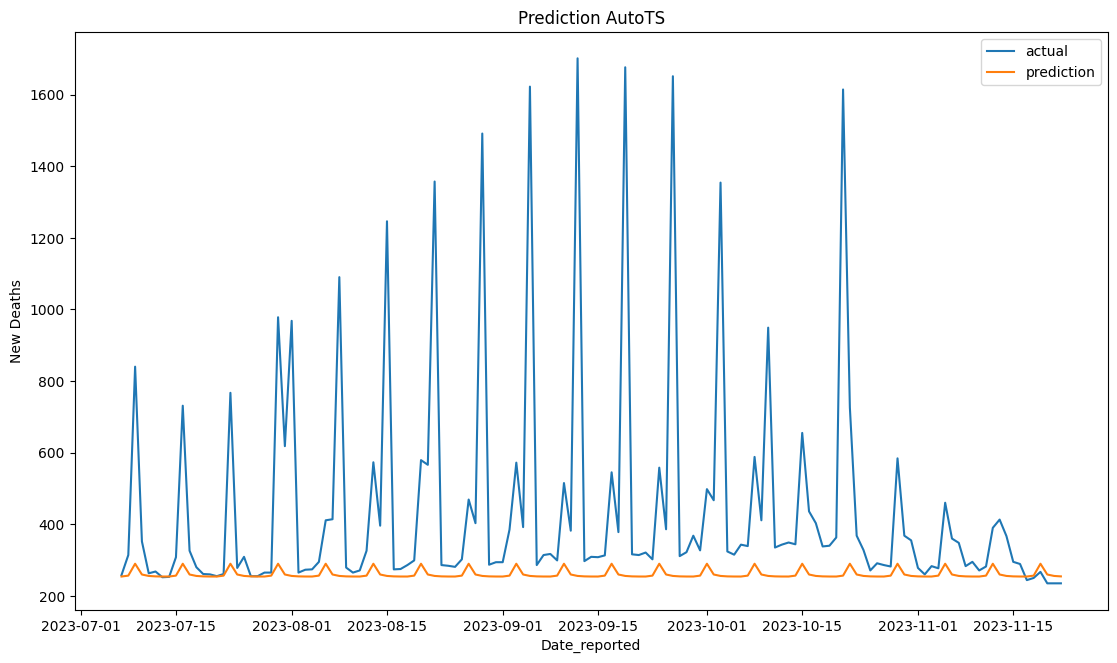

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], (test[target_column]-1).values, label="actual")
ax.plot(dates[int(data_length*train_split):], non_zero, label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [9]:
print_evaluation_metrics(non_zero, test[target_column]-1, train[target_column] - 1)

Evaluation Metrics:
MSE: 139630.53
RMSE: 373.67
MAE: 188.53
MAPE: 27.06
SMAPE: 36.26
MASE: 0.11


In [10]:
store_model(model, "automl")

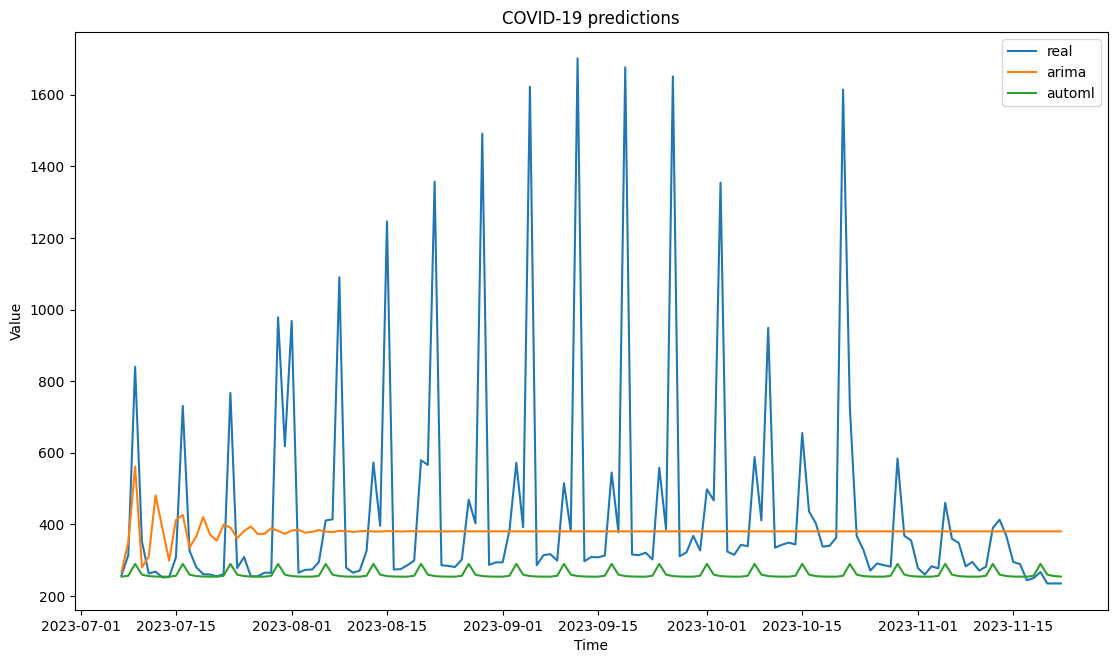

In [11]:
store_predictions_and_create_graph("automl", dates[int(data_length*train_split):], non_zero, test[target_column]-1, "COVID-19")